<a href="https://colab.research.google.com/github/SuyashPatil-max/Finlatics/blob/main/Media%26Technology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/ML /Finlatics/DsResearch/Media and Technology/Media and Technology/Global YouTube Statistics.csv',encoding = 'latin-1')
df.shape

(1006, 29)

In [3]:

df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country of origin,Country,Abbreviation,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000.0,2.280000e+11,Music,T-Series,20082,India,india,IN,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000.0,0.000000e+00,Film & Animation,youtubemovies,1,United States,United States,US,...,NaN,2006.0,NaN,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000.0,2.836884e+10,Entertainment,MrBeast,741,United States,United States,US,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000.0,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,United States,US,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000.0,1.480000e+11,Shows,SET India,116536,India,India,IN,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [4]:
cols = df.columns
cols

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country of origin', 'Country', 'Abbreviation',
       'channel_type', 'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     1006 non-null   int64  
 1   Youtuber                                 1006 non-null   object 
 2   subscribers                              1003 non-null   float64
 3   video views                              1006 non-null   float64
 4   category                                 951 non-null    object 
 5   Title                                    1006 non-null   object 
 6   uploads                                  1006 non-null   int64  
 7   Country of origin                        881 non-null    object 
 8   Country                                  881 non-null    object 
 9   Abbreviation                             881 non-null    object 
 10  channel_type                             974 non

In [6]:
df.isnull().sum()

,0
rank,0
Youtuber,0
subscribers,3
video views,0
category,55
Title,0
uploads,0
Country of origin,125
Country,125
Abbreviation,125


In [7]:
num = df.select_dtypes(include ='number')
cat = df.select_dtypes(include='object')

num.shape ,cat.shape

((1006, 21), (1006, 8))

In [8]:
cat = cat.fillna(cat.mode().iloc[0])
cat.isnull().sum()

,0
Youtuber,0
category,0
Title,0
Country of origin,0
Country,0
Abbreviation,0
channel_type,0
created_month,0


In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')
num_new = imputer.fit_transform(num)
num_new = pd.DataFrame(num_new ,columns = num.columns ,index = num.index)

In [10]:
df = pd.concat([num_new , cat],axis = 1 )

In [11]:
df.head()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,Latitude,Longitude,Youtuber,category,Title,Country of origin,Country,Abbreviation,channel_type,created_month
0,1.0,245000000.0,2.280000e+11,20082.0,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,...,20.593684,78.962880,T-Series,Music,T-Series,India,india,IN,Music,Mar
1,2.0,170000000.0,0.000000e+00,1.0,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,...,37.090240,-95.712891,YouTube Movies,Film & Animation,youtubemovies,United States,United States,US,Games,Jan
2,3.0,166000000.0,2.836884e+10,741.0,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,...,37.090240,-95.712891,MrBeast,Entertainment,MrBeast,United States,United States,US,Entertainment,Feb
3,4.0,162000000.0,1.640000e+11,966.0,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,...,37.090240,-95.712891,Cocomelon - Nursery Rhymes,Education,Cocomelon - Nursery Rhymes,United States,United States,US,Education,Sep
4,5.0,159000000.0,1.480000e+11,116536.0,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,...,20.593684,78.962880,SET India,Shows,SET India,India,India,IN,Entertainment,Sep


In [12]:
df = df.reindex(columns = cols)
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country of origin,Country,Abbreviation,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1.0,T-Series,245000000.0,2.280000e+11,Music,T-Series,20082.0,India,india,IN,...,2.000000e+06,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2.0,YouTube Movies,170000000.0,0.000000e+00,Film & Animation,youtubemovies,1.0,United States,United States,US,...,3.495419e+05,2006.0,Jan,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3.0,MrBeast,166000000.0,2.836884e+10,Entertainment,MrBeast,741.0,United States,United States,US,...,8.000000e+06,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4.0,Cocomelon - Nursery Rhymes,162000000.0,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966.0,United States,United States,US,...,1.000000e+06,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5.0,SET India,159000000.0,1.480000e+11,Shows,SET India,116536.0,India,India,IN,...,1.000000e+06,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


# EDA

In [13]:
palet = ['#201E43','#134B70','#508C9B','#EEEEEE']

In [14]:
grp = df.groupby('Youtuber')['subscribers']
grp = grp.sum()
grp = grp.sort_values(ascending = False)
top10 = (grp.head(10).index).tolist()
print('Top 10 channels with subscribers are : ')
for i in top10 :
  print(i)

Top 10 channels with subscribers are : 
T-Series
WWE
Gaming
YouTube Movies
MrBeast
Cocomelon - Nursery Rhymes
SET India
Music
ýýý Kids Diana Show
PewDiePie


In [15]:
grp = df.groupby('category')['subscribers']
grp =grp.mean()
grp = grp.sort_values(ascending = False)
grp

,subscribers
category,
Shows,4.161538e+07
Trailers,3.900000e+07
Sports,3.285000e+07
Nonprofits & Activism,2.775000e+07
Film & Animation,2.752878e+07
Education,2.712391e+07
Music,2.604926e+07
Movies,2.565000e+07
Entertainment,2.248462e+07


/tmp/ipython-input-402379860.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index , y =grp ,palette = palet)
/tmp/ipython-input-402379860.py:2: UserWarning: 
The palette list has fewer values (4) than needed (18) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index , y =grp ,palette = palet)


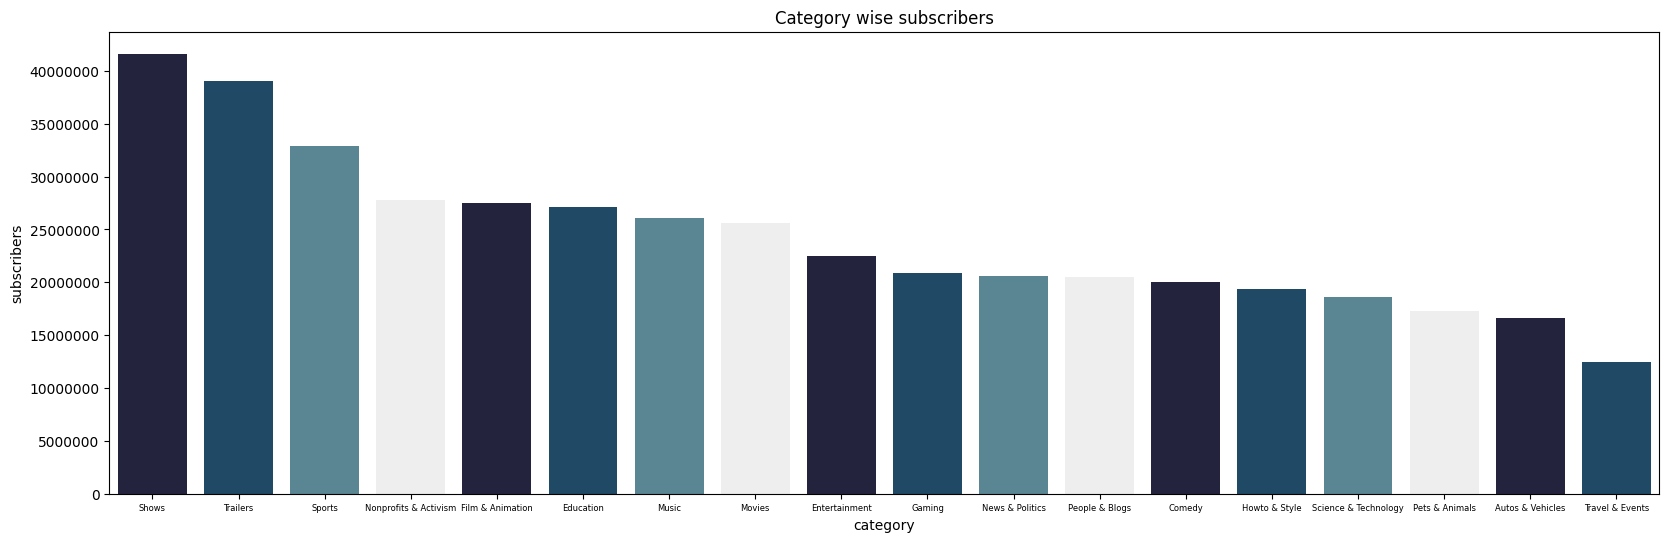


The highest average number of subscribers is : Shows


In [16]:
fig = plt.figure(figsize = (20,6))
sns.barplot(x = grp.index , y =grp ,palette = palet)
plt.tick_params(axis = 'x',labelsize =6  )
plt.ticklabel_format(style = 'plain',axis = 'y')
plt.title('Category wise subscribers')
plt.show()

print()
print("The highest average number of subscribers is : Shows")

In [17]:
df['uploads']
grp = df.groupby('category')['uploads']
grp = grp.mean()
grp

,uploads
category,
Autos & Vehicles,1550.666667
Comedy,1202.557143
Education,3087.086957
Entertainment,9938.399317
Film & Animation,2861.844444
Gaming,4285.273684
Howto & Style,1695.500000
Movies,3553.000000
Music,2325.945813


/tmp/ipython-input-3052597313.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index , y =grp ,palette = palet)
/tmp/ipython-input-3052597313.py:2: UserWarning: 
The palette list has fewer values (4) than needed (18) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index , y =grp ,palette = palet)


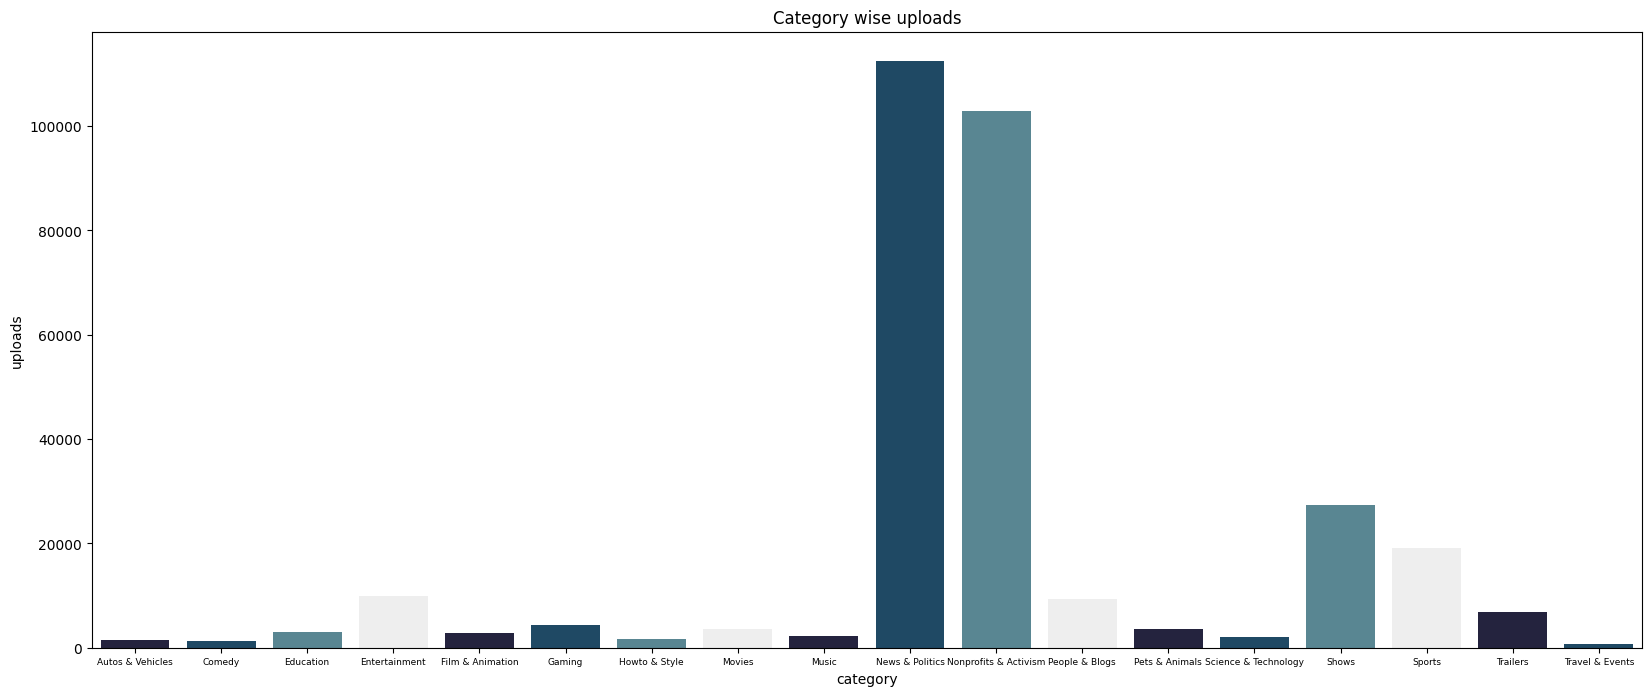

In [18]:
fig = plt.figure(figsize = (20,8))
sns.barplot(x = grp.index , y =grp ,palette = palet)
plt.tick_params(axis = 'x',labelsize =6.5)
plt.tick_params(axis = 'y',labelsize =10 )
plt.ticklabel_format(style = 'plain',axis = 'y')
plt.title('Category wise uploads')
plt.show()

In [19]:
top5 = (df['Country'].value_counts().head(5).index).tolist()
print("Top 5 countries with highest nuber of youtube channels are : ")
for i in top5 :
  print(i)

Top 5 countries with highest nuber of youtube channels are : 
United States
India
Brazil
United Kingdom
Mexico


In [20]:
grp = df.groupby(['category','channel_type'])
grp = grp.size().reset_index(name='count')
grp.head()

,category,channel_type,count
0,Autos & Vehicles,Autos,2
1,Autos & Vehicles,Entertainment,1
2,Comedy,Comedy,39
3,Comedy,Entertainment,22
4,Comedy,Film,1


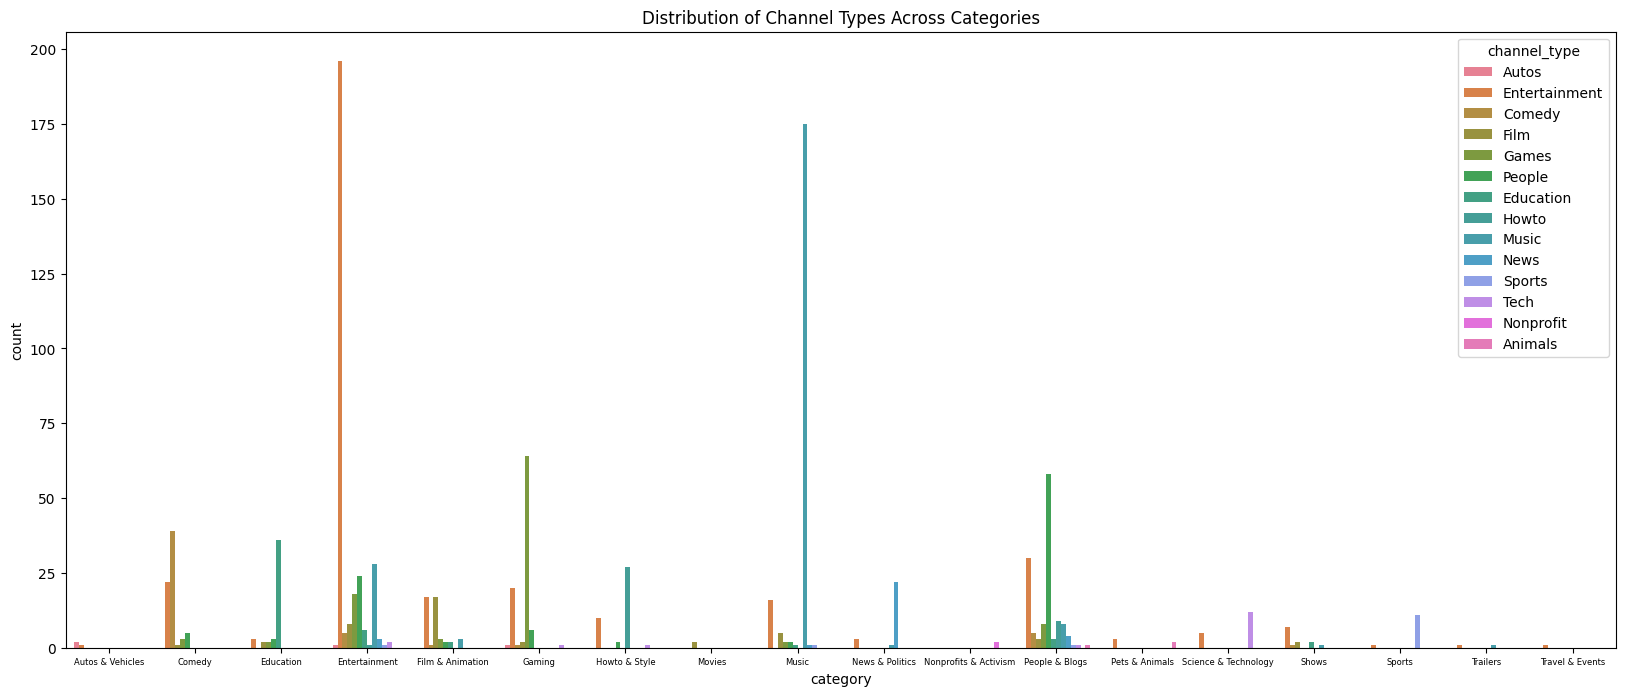

In [21]:
fig = plt.figure(figsize = (20,8))
sns.barplot(data=grp,x='category',y='count',hue='channel_type')
plt.title('Distribution of Channel Types Across Categories')
plt.tick_params(axis ='x' ,labelsize = 6)
plt.tick_params(axis ='y' ,labelsize = 10)
plt.show()


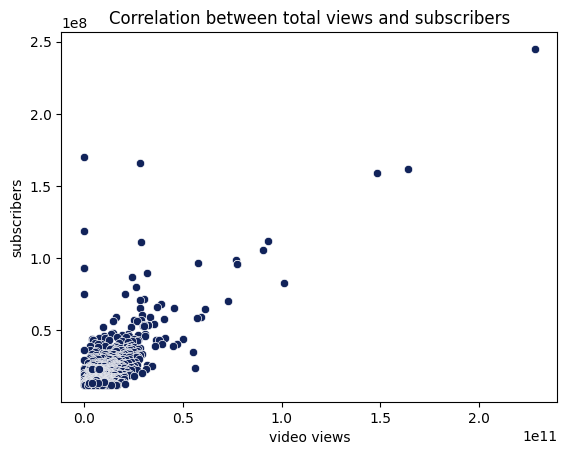

In [22]:
sns.scatterplot(x = 'video views' ,y = 'subscribers',data =df ,color = '#11235A')
plt.title('Correlation between total views and subscribers')
plt.show()

In [23]:
grp = df.groupby('category')[['lowest_monthly_earnings','highest_monthly_earnings']]
grp = grp.sum()
grp = pd.DataFrame(grp)
grp['total_monthly_earnings'] = grp['highest_monthly_earnings'] + grp['lowest_monthly_earnings']
grp.head()

,lowest_monthly_earnings,highest_monthly_earnings,total_monthly_earnings
category,,,
Autos & Vehicles,224900.00,3.572700e+06,3.797600e+06
Comedy,2893260.00,4.618344e+07,4.907670e+07
Education,2155709.01,3.458300e+07,3.673871e+07
Entertainment,12360693.55,1.975482e+08,2.099089e+08
Film & Animation,2106114.01,3.370428e+07,3.581040e+07


/tmp/ipython-input-3068410094.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index , y =grp['total_monthly_earnings'] ,palette = palet)
/tmp/ipython-input-3068410094.py:2: UserWarning: 
The palette list has fewer values (4) than needed (18) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index , y =grp['total_monthly_earnings'] ,palette = palet)


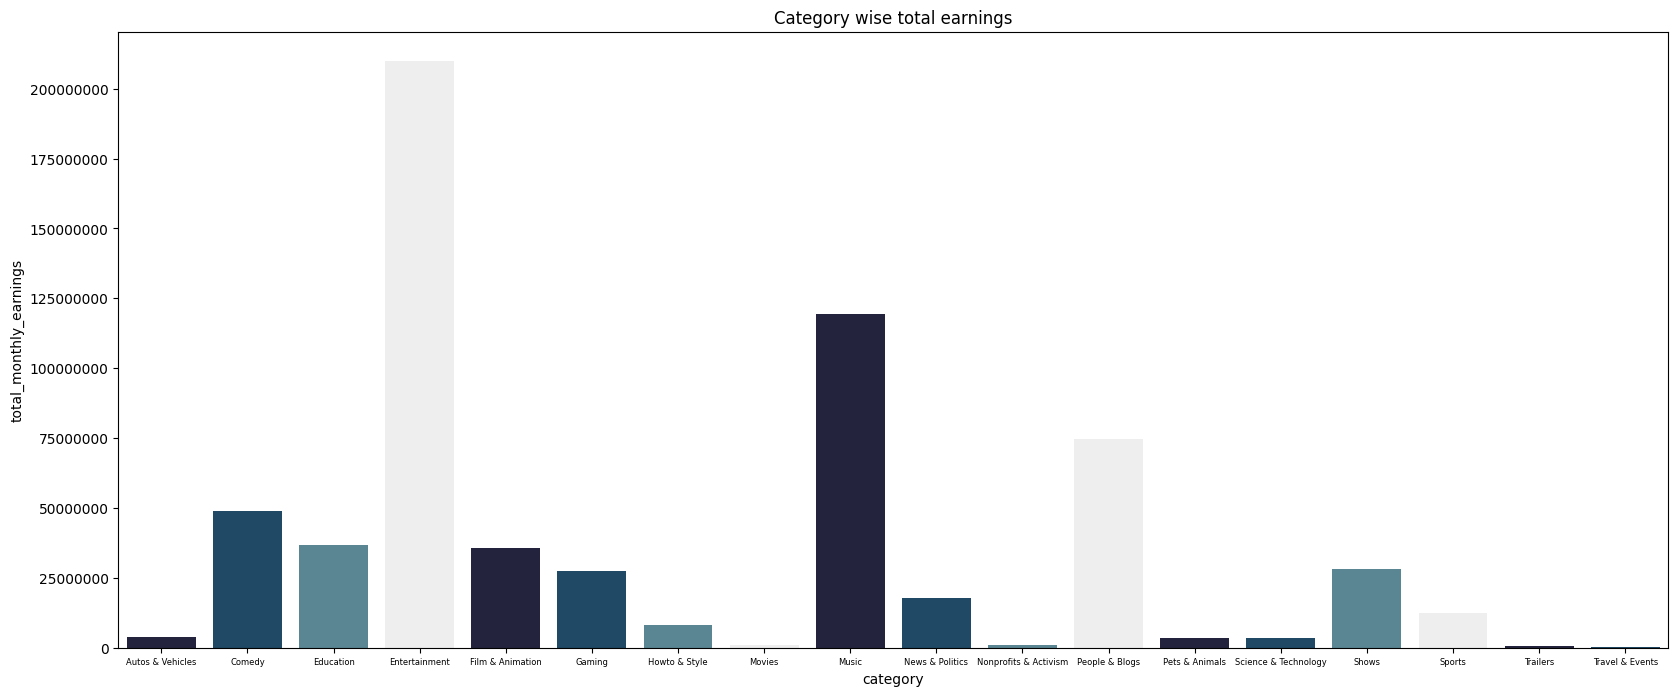

In [24]:
fig = plt.figure(figsize = (20,8))
sns.barplot(x = grp.index , y =grp['total_monthly_earnings'] ,palette = palet)
plt.tick_params(axis = 'x',labelsize = 6 )
plt.tick_params(axis = 'y',labelsize =10 )
plt.ticklabel_format(axis ='y',style ='plain')
plt.title('Category wise total earnings')

plt.show()

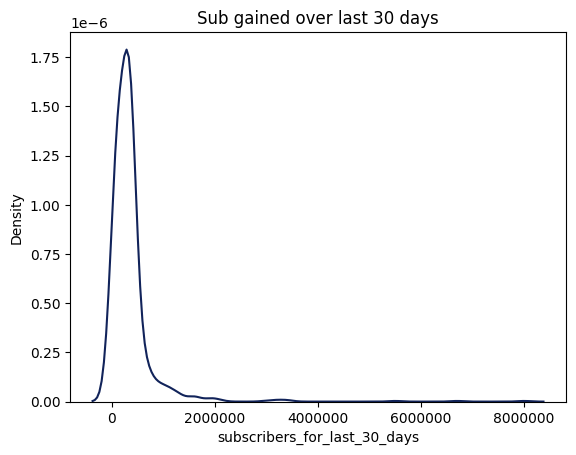

In [25]:
sns.kdeplot(x = 'subscribers_for_last_30_days' ,data =df ,color ='#11235A')
plt.ticklabel_format(axis ='x' ,style ='plain')
plt.title('Sub gained over last 30 days')
plt.show()

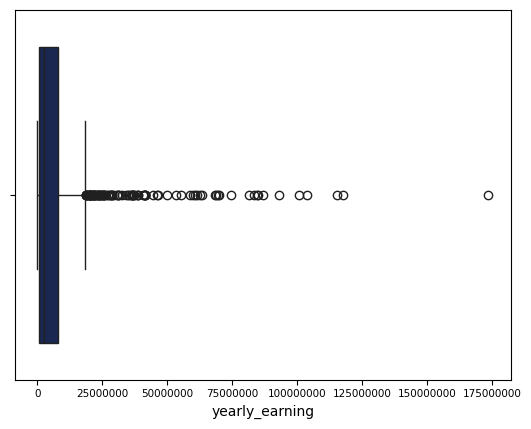

In [26]:
df['yearly_earning'] = df['highest_yearly_earnings'] + df['lowest_yearly_earnings']
sns.boxplot(x = 'yearly_earning' ,data =df ,color ='#11235A')
plt.tick_params(axis ='x' ,labelsize =7.5)
plt.ticklabel_format(axis ='x' ,style ='plain')
plt.show()

In [27]:
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country of origin,Country,Abbreviation,...,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,yearly_earning
0,1.0,T-Series,245000000.0,2.280000e+11,Music,T-Series,20082.0,India,india,IN,...,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,1.152000e+08
1,2.0,YouTube Movies,170000000.0,0.000000e+00,Film & Animation,youtubemovies,1.0,United States,United States,US,...,2006.0,Jan,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,6.200000e-01
2,3.0,MrBeast,166000000.0,2.836884e+10,Entertainment,MrBeast,741.0,United States,United States,US,...,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,6.870000e+07
3,4.0,Cocomelon - Nursery Rhymes,162000000.0,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966.0,United States,United States,US,...,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,1.007000e+08
4,5.0,SET India,159000000.0,1.480000e+11,Shows,SET India,116536.0,India,India,IN,...,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,9.300000e+07


In [40]:
grp = df.groupby('created_year')
grp = grp.size()
grp

,0
created_year,
1970.000000,1
2005.000000,24
2006.000000,93
2007.000000,52
2008.000000,46
2009.000000,52
2010.000000,48
2011.000000,82
2012.000000,68


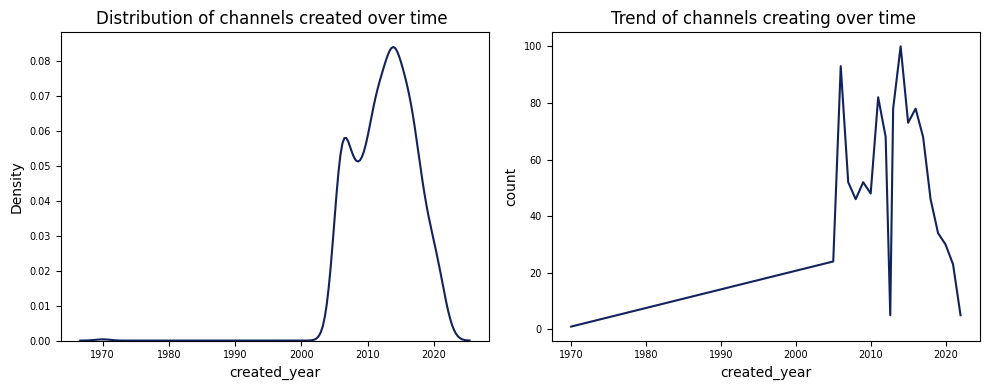

In [46]:
fig ,axes = plt.subplots(1,2 ,figsize = (10,4))

sns.kdeplot(x ='created_year' , color ='#11235A' ,data =df ,ax = axes[0] )
axes[0].set_title('Distribution of channels created over time ')
axes[0].tick_params(axis ='x' ,labelsize =7 )
axes[0].tick_params(axis ='y' ,labelsize =7 )
axes[0].ticklabel_format(axis ='y' ,style ='plain')

sns.lineplot(x = grp.index ,y =grp ,color = '#11235A' ,ax = axes[1])
axes[1].set_title('Trend of channels creating over time ')
axes[1].tick_params(axis ='x' ,labelsize =7 )
axes[1].tick_params(axis ='y' ,labelsize =7 )
axes[1].set_ylabel( 'count')
axes[1].ticklabel_format(axis ='y' ,style ='plain')

plt.tight_layout()
plt.show()

In [48]:
grp1 = df['Abbreviation'].value_counts()
grp1 = pd.DataFrame(grp1)
grp1.head()

,count
Abbreviation,
US,440
IN,170
BR,62
GB,44
MX,33


In [49]:
grp = df.groupby('Abbreviation')['Gross tertiary education enrollment (%)']
grp = grp.sum()
grp = pd.DataFrame(grp)
grp.head()

,Gross tertiary education enrollment (%)
Abbreviation,
AD,63.597273
AE,294.400000
AF,9.700000
AR,1170.000000
AU,1017.900000


In [50]:
grp = pd.concat([grp ,grp1],axis =1 )
grp.head()

,Gross tertiary education enrollment (%),count
Abbreviation,,
AD,63.597273,1
AE,294.400000,8
AF,9.700000,1
AR,1170.000000,13
AU,1017.900000,9


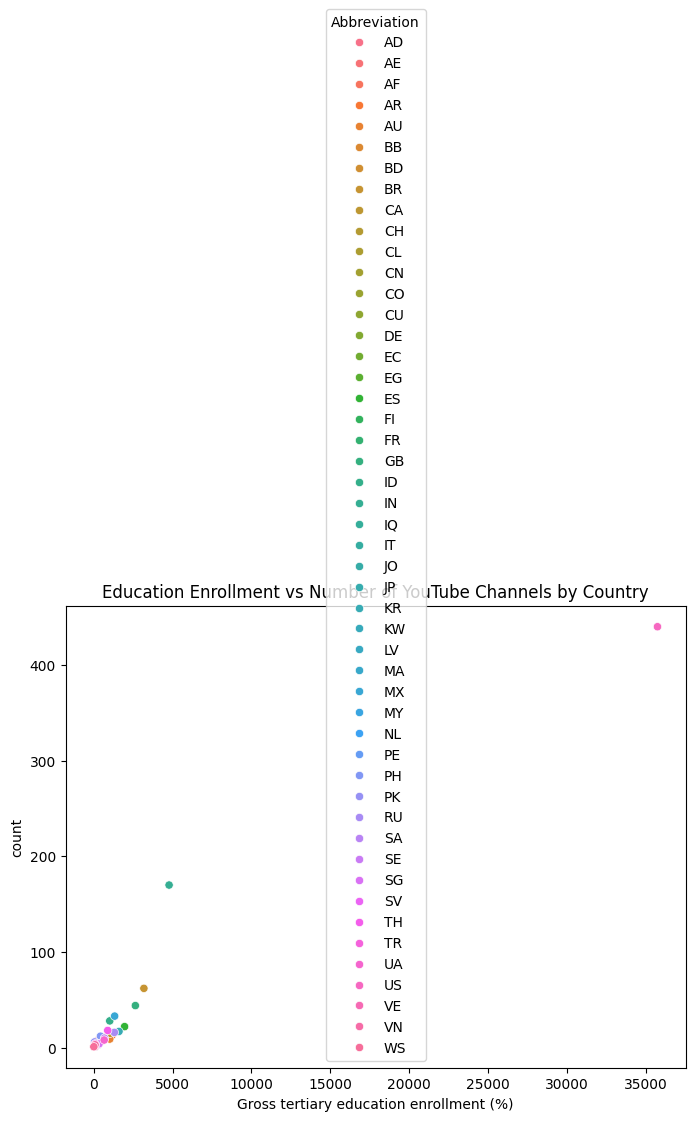

In [53]:
fig = plt.figure(figsize=(8,6))

sns.scatterplot(x ='Gross tertiary education enrollment (%)' ,y = 'count',data =grp,hue =grp.index )
plt.title("Education Enrollment vs Number of YouTube Channels by Country")
plt.show()

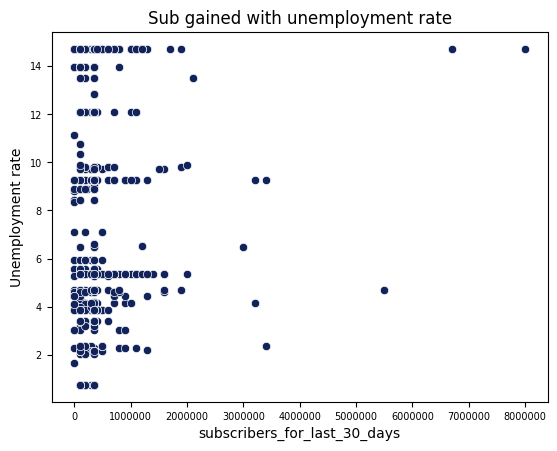

In [58]:
sns.scatterplot(x = 'subscribers_for_last_30_days' ,y= 'Unemployment rate',data =df  ,color = '#11235A' )
plt.title('Sub gained with unemployment rate')
plt.tick_params(axis ='x' , labelsize= 7 )
plt.tick_params(axis ='y' , labelsize= 7 )
plt.ticklabel_format(axis ='y' ,style ='plain')
plt.ticklabel_format(axis ='x' ,style ='plain')
plt.show()

In [60]:
grp = df.groupby('category')['video views']
grp = grp.sum()
grp

,video views
category,
Autos & Vehicles,2.040902e+10
Comedy,5.575194e+11
Education,7.271306e+11
Entertainment,2.899991e+12
Film & Animation,5.203043e+11
Gaming,7.217681e+11
Howto & Style,2.018979e+11
Movies,1.538326e+10
Music,3.181717e+12


/tmp/ipython-input-3966788330.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index ,y = grp , palette = palet)
/tmp/ipython-input-3966788330.py:3: UserWarning: 
The palette list has fewer values (4) than needed (18) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index ,y = grp , palette = palet)


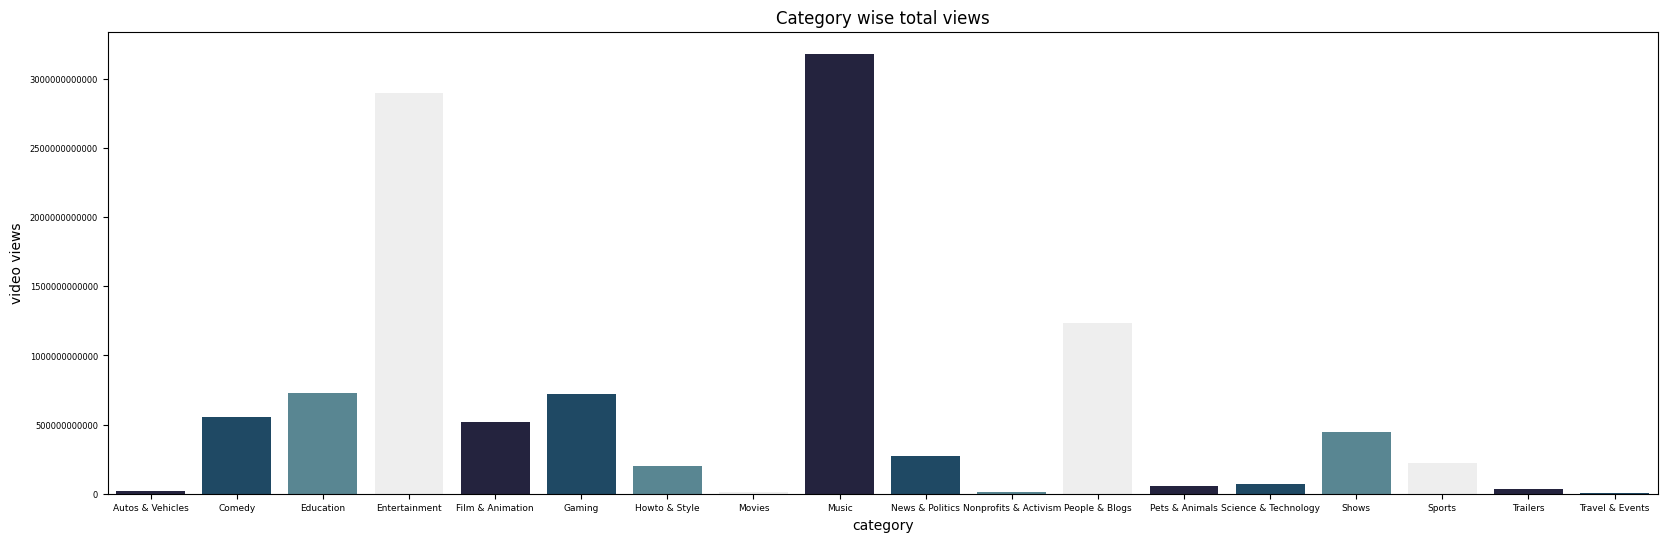

In [66]:
plt.figure(figsize =(20,6))

sns.barplot(x = grp.index ,y = grp , palette = palet)
plt.tick_params(axis ='x' ,labelsize = 6.5 )
plt.tick_params(axis ='y' ,labelsize = 6)
plt.ticklabel_format(axis ='y' ,style ='plain')
plt.title('Category wise total views')
plt.show()

In [90]:
grp = df.groupby('created_month')['uploads']
grp = grp.sum()
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

grp = grp.reindex(month_order)
grp

,uploads
created_month,
Jan,817410.0
Feb,786083.0
Mar,373174.0
Apr,177495.0
May,728341.0
Jun,979456.0
Jul,498739.0
Aug,1320718.0
Sep,1181665.0


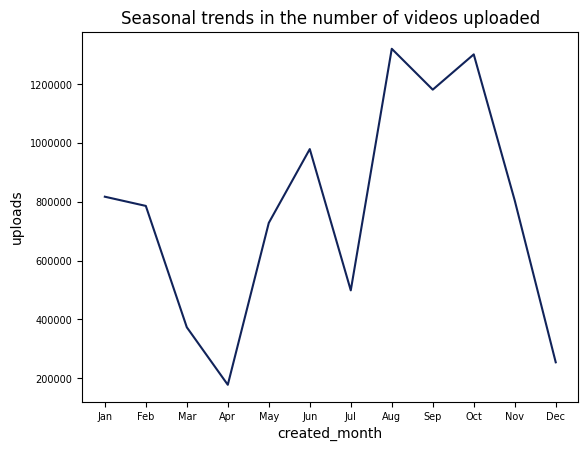

In [91]:
sns.lineplot(x = grp.index ,y = grp ,color = '#11235A')
plt.tick_params(axis ='x' ,labelsize = 7 )
plt.tick_params(axis ='y' ,labelsize = 7)
plt.title('Seasonal trends in the number of videos uploaded')
plt.ticklabel_format(axis ='y' , style ='plain')
plt.show()

In [77]:
grp = df.groupby('Youtuber')['subscribers_for_last_30_days']
grp =grp.mean()
grp

,subscribers_for_last_30_days
Youtuber,
#Refugio Mental,349541.852853
#Refï¿½ï¿½ï¿½ï¿½,349541.852853
123 GO! Spanish,100000.000000
1MILLION Dance Studio,349541.852853
1theK (ï¿½ï¿½ï¿½ï¿½ï,349541.852853
...,...
ýýýýýýýýýýýýýýýý - Al-Remas,349541.852853
ýýýýýýýýýýýýýýýýýý,100000.000000
ýýýýýýýýýýýýýýýýýýýý ýýýýýýýýýýýýýýýýýýýý,132.000000


/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


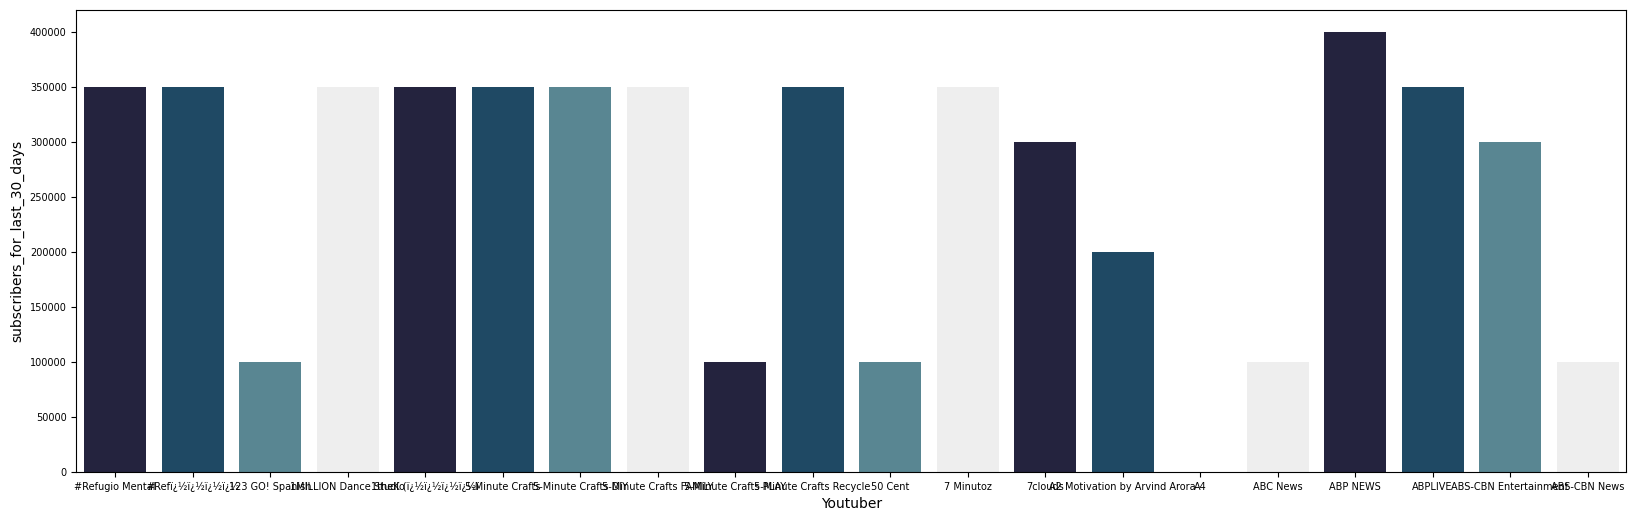

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


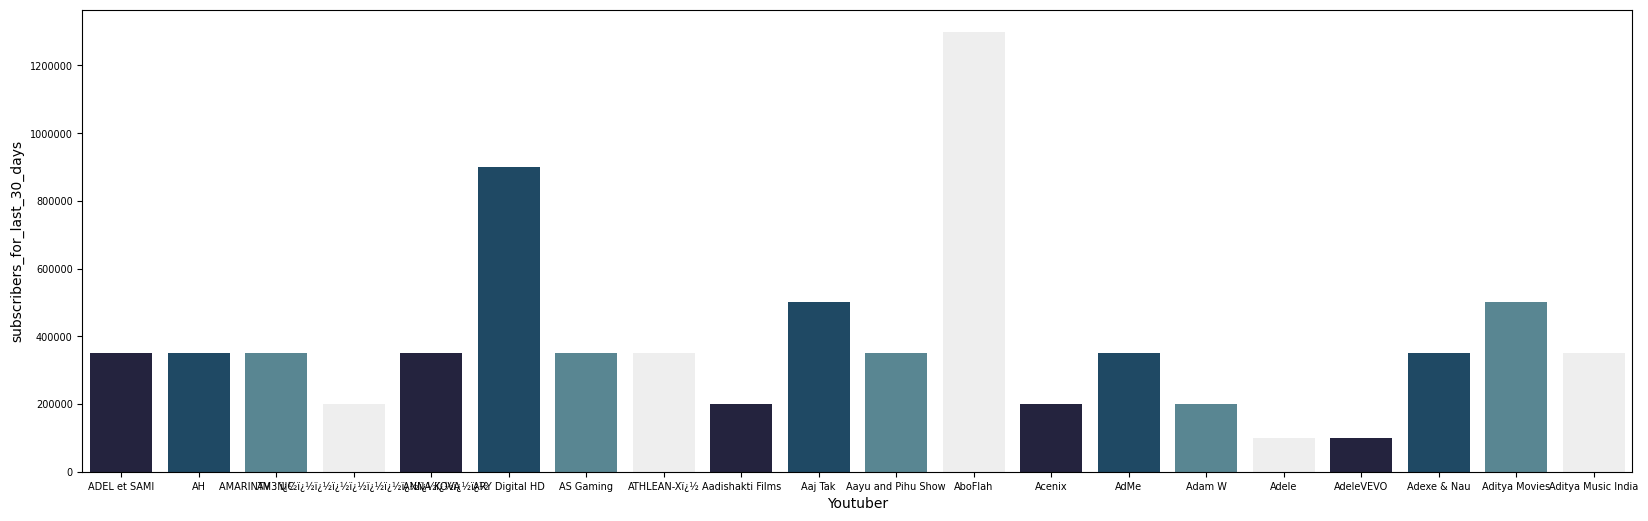

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


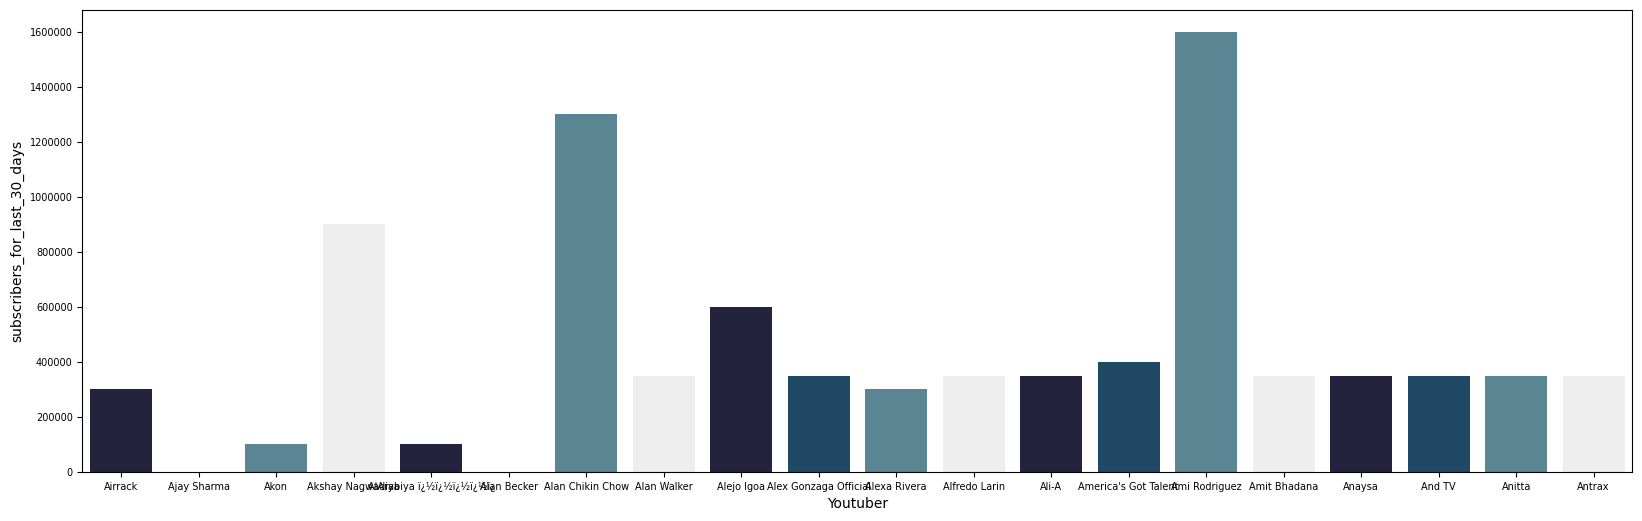

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


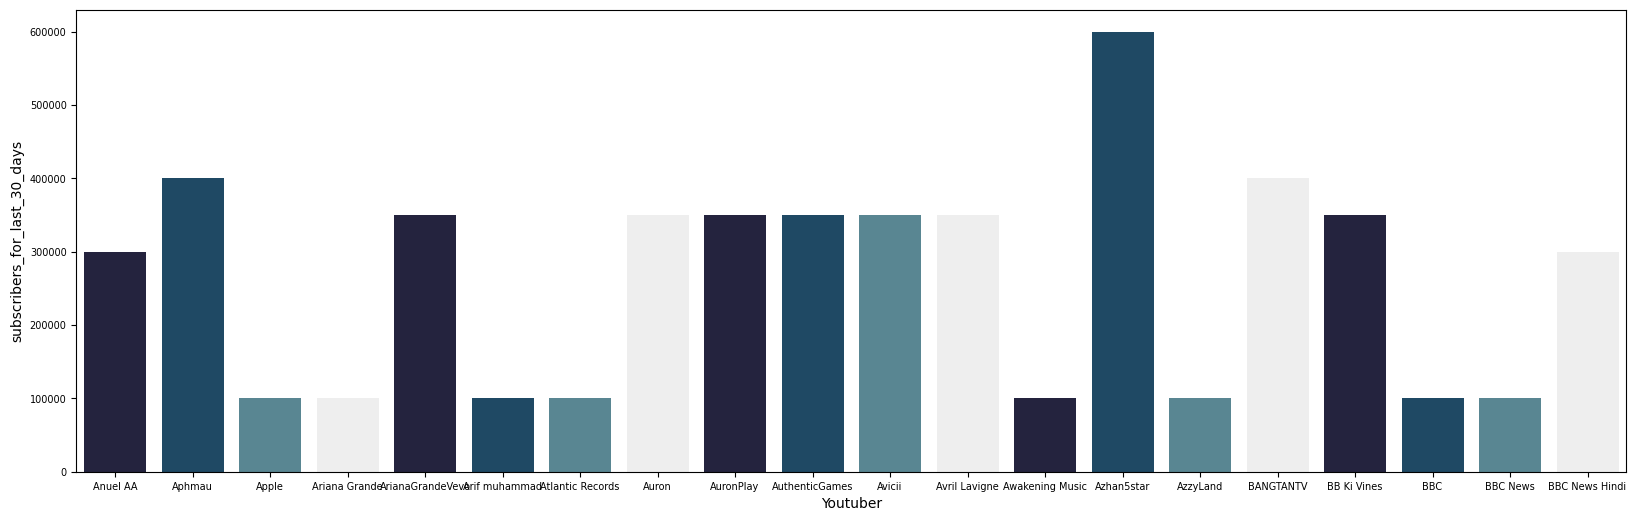

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


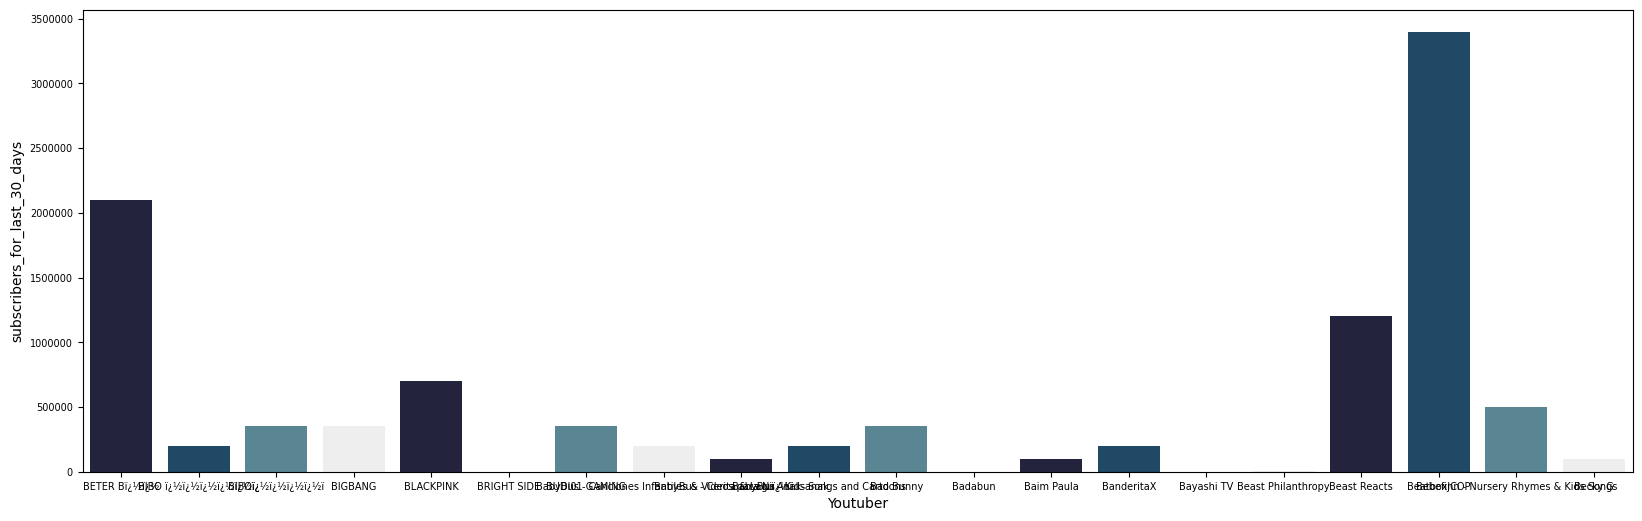

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


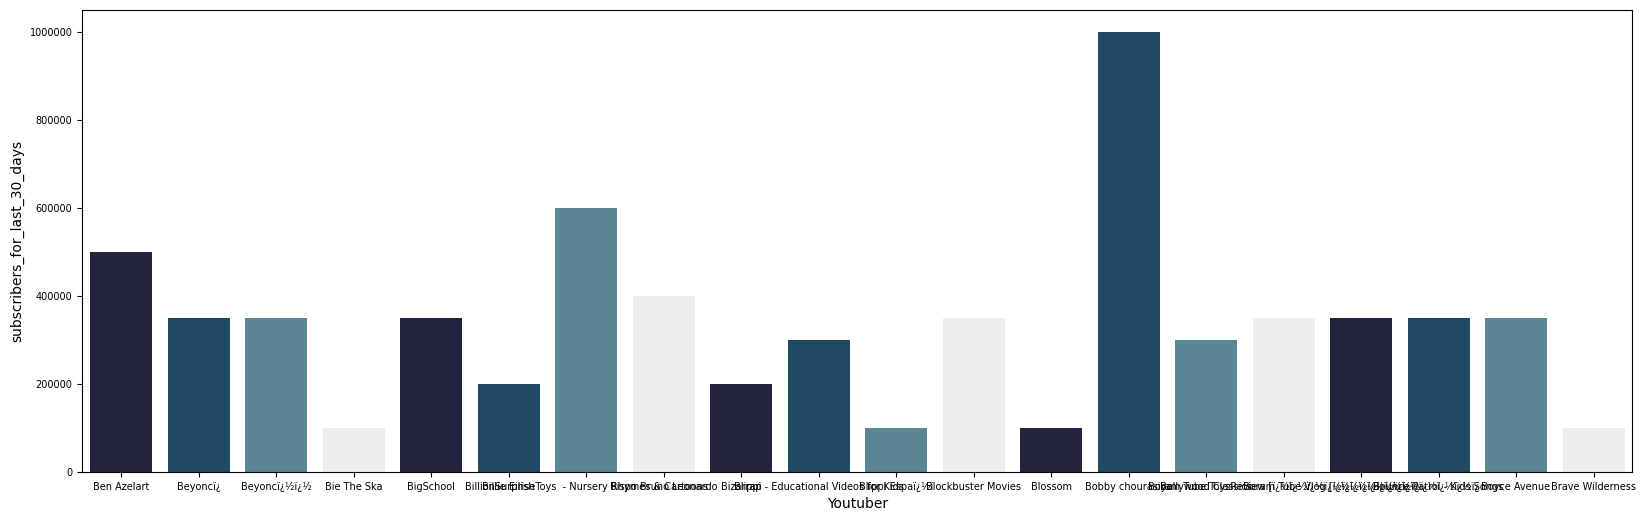

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


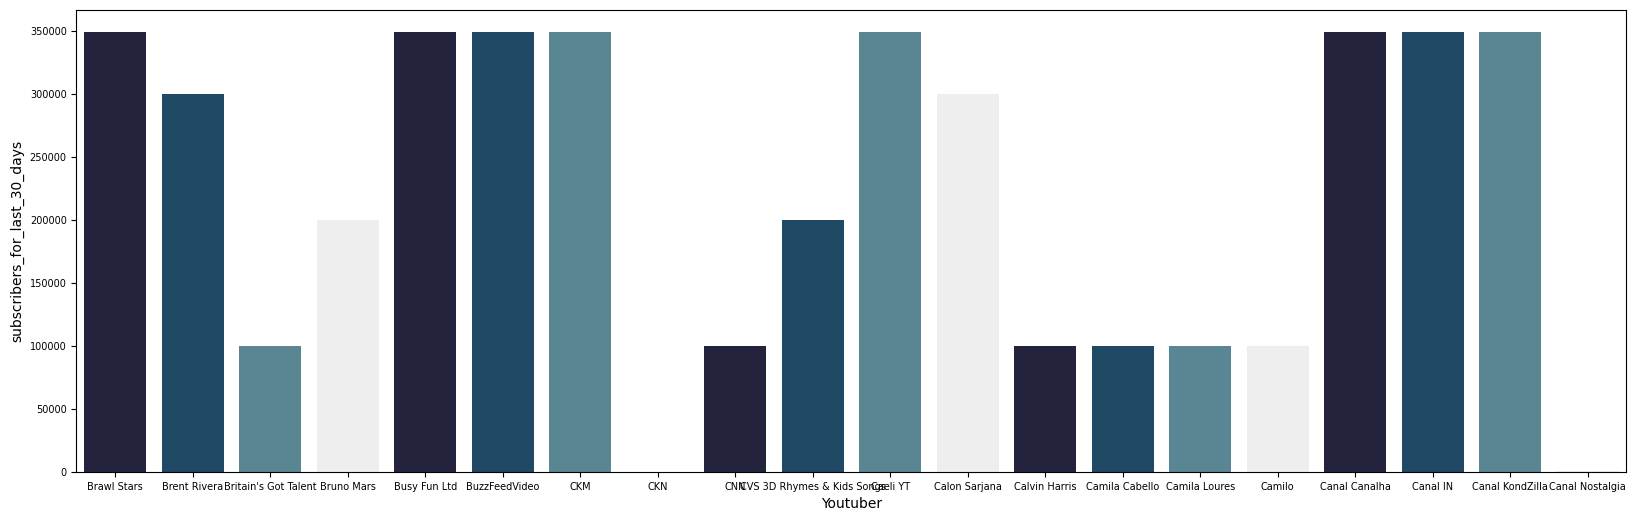

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


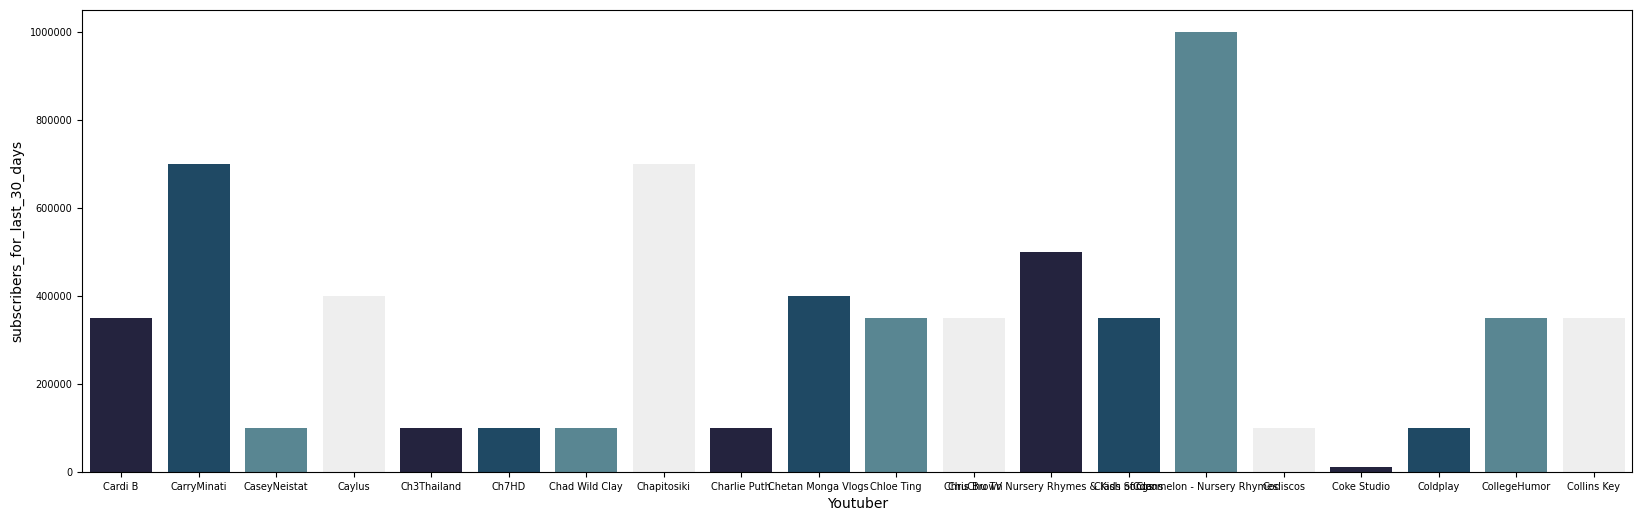

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


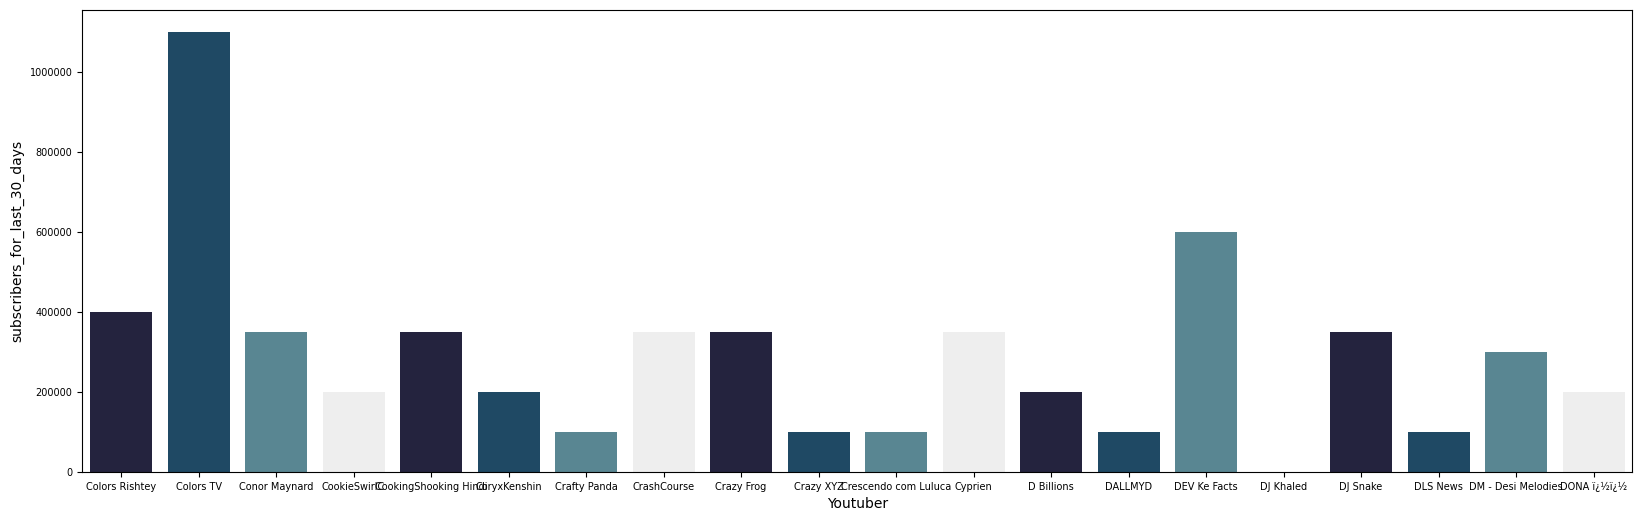

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


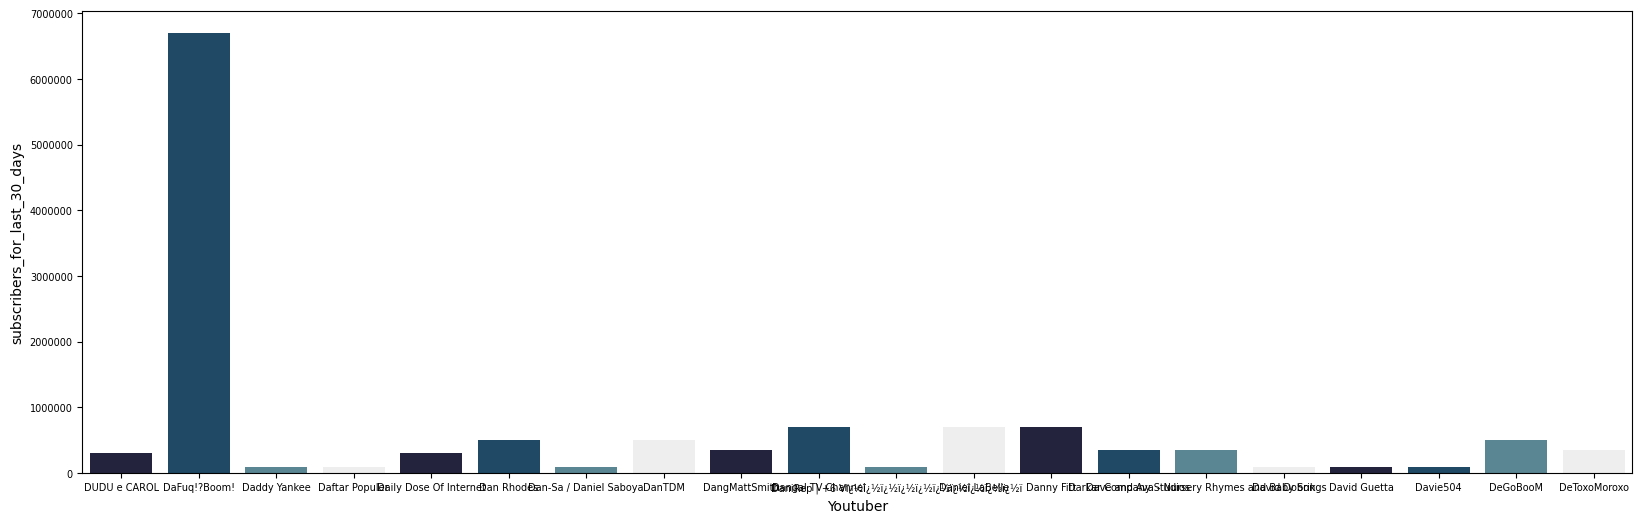

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


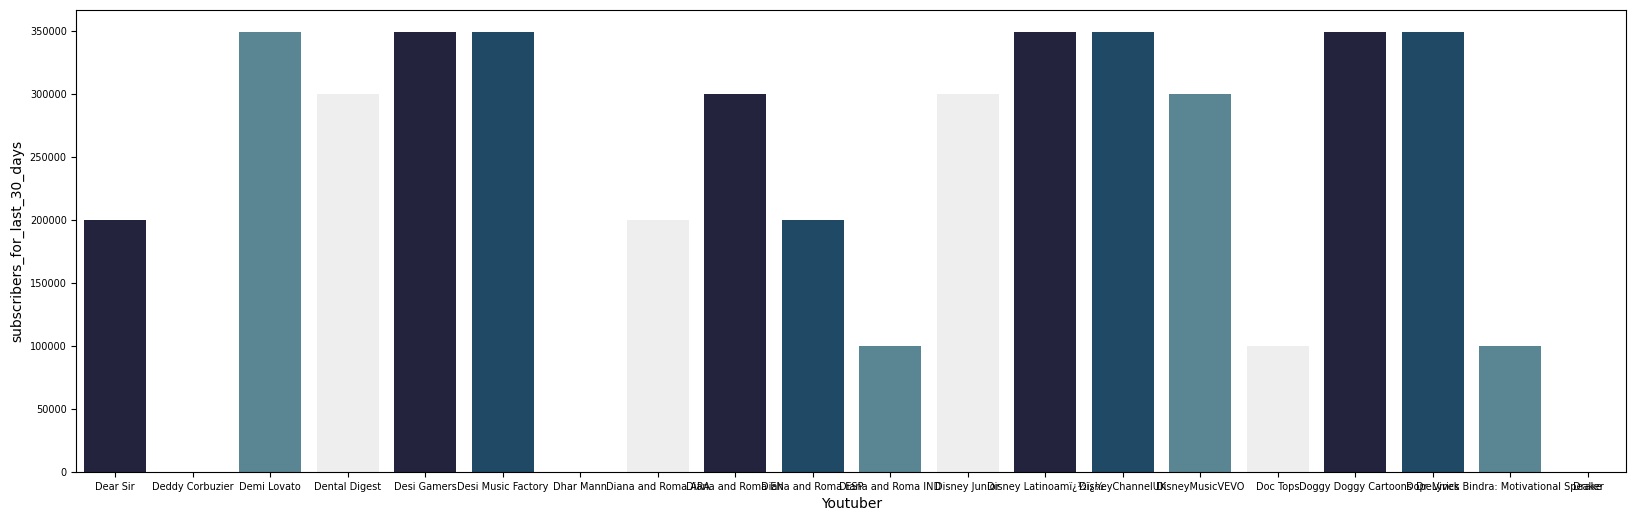

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


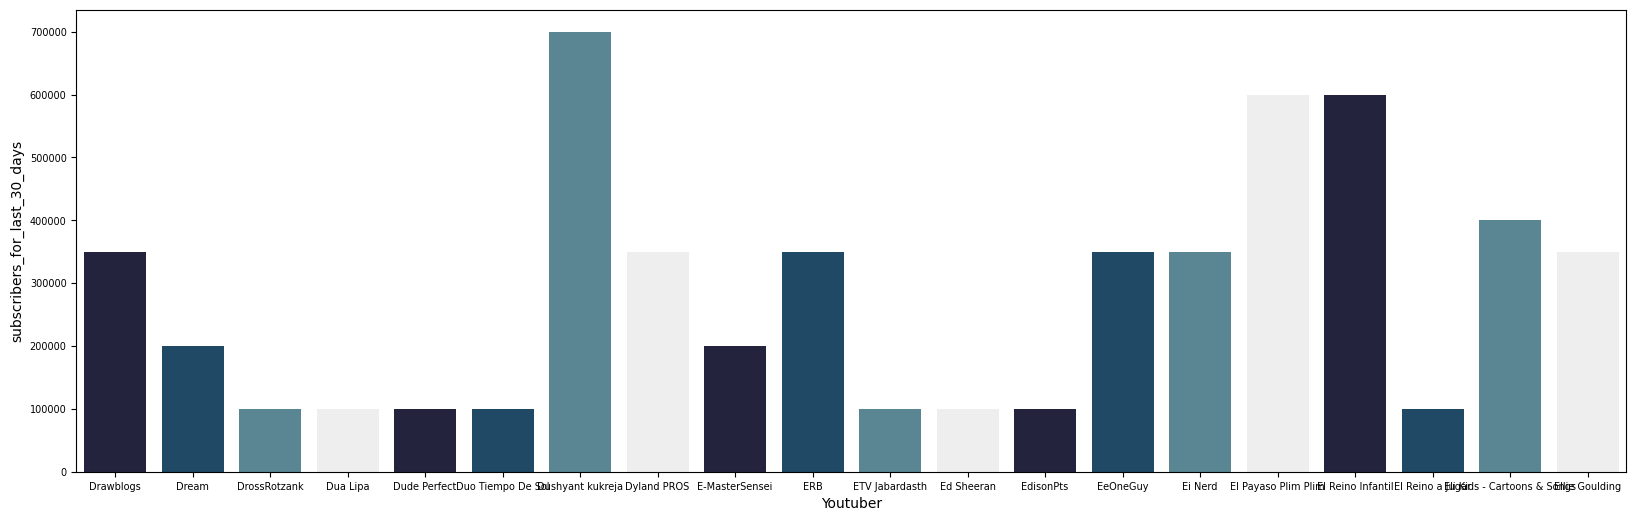

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


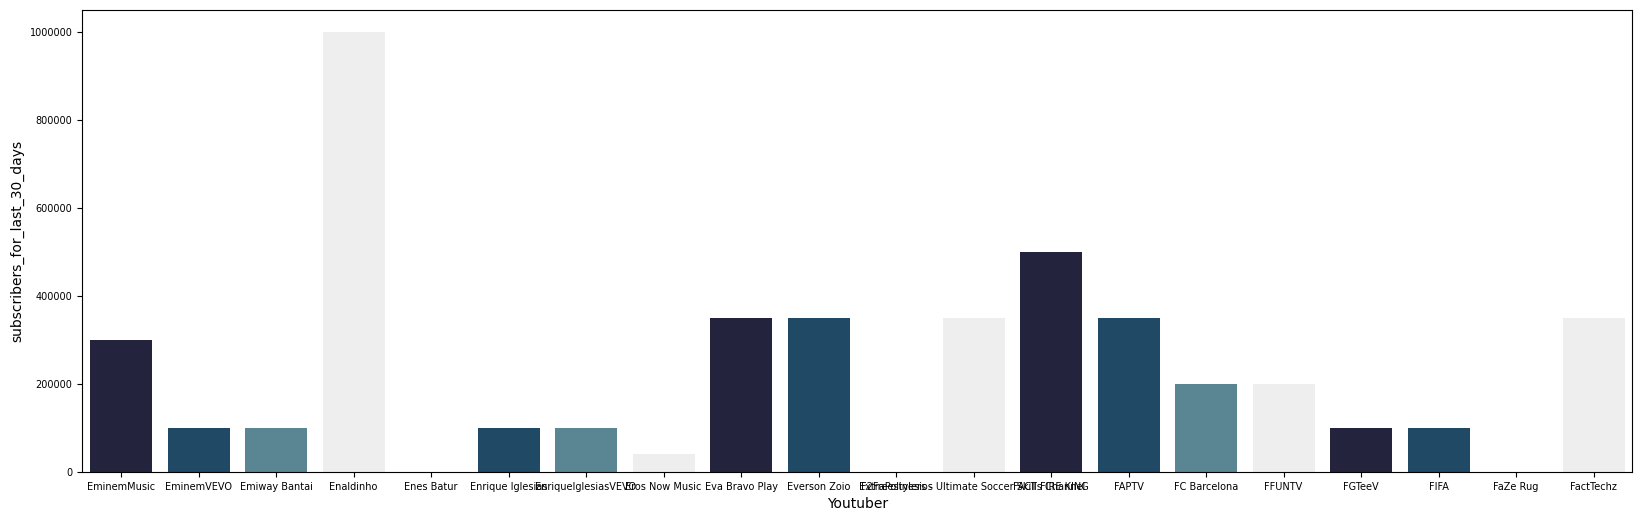

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


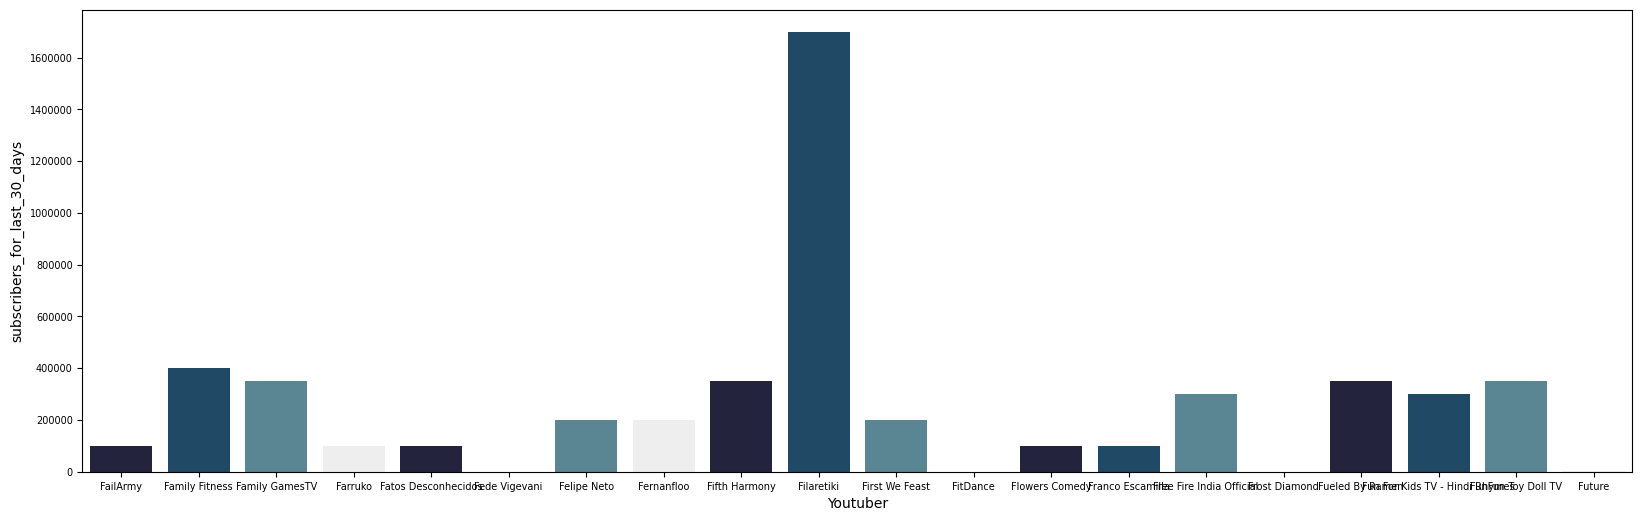

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


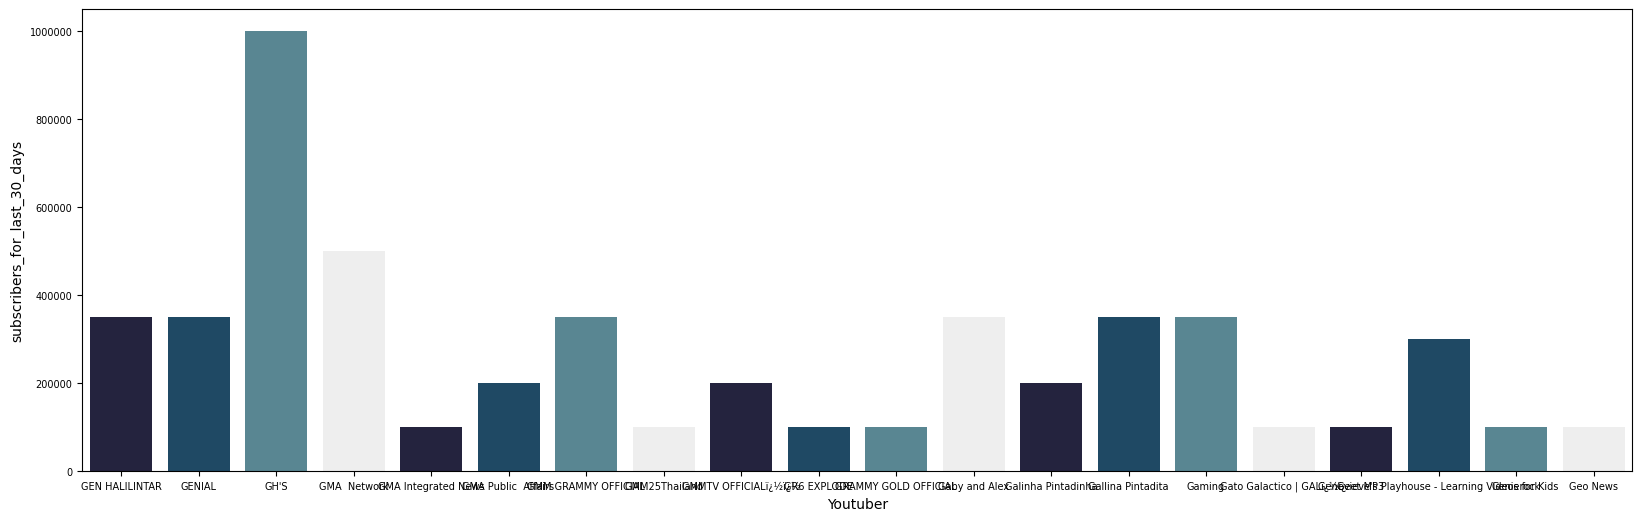

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


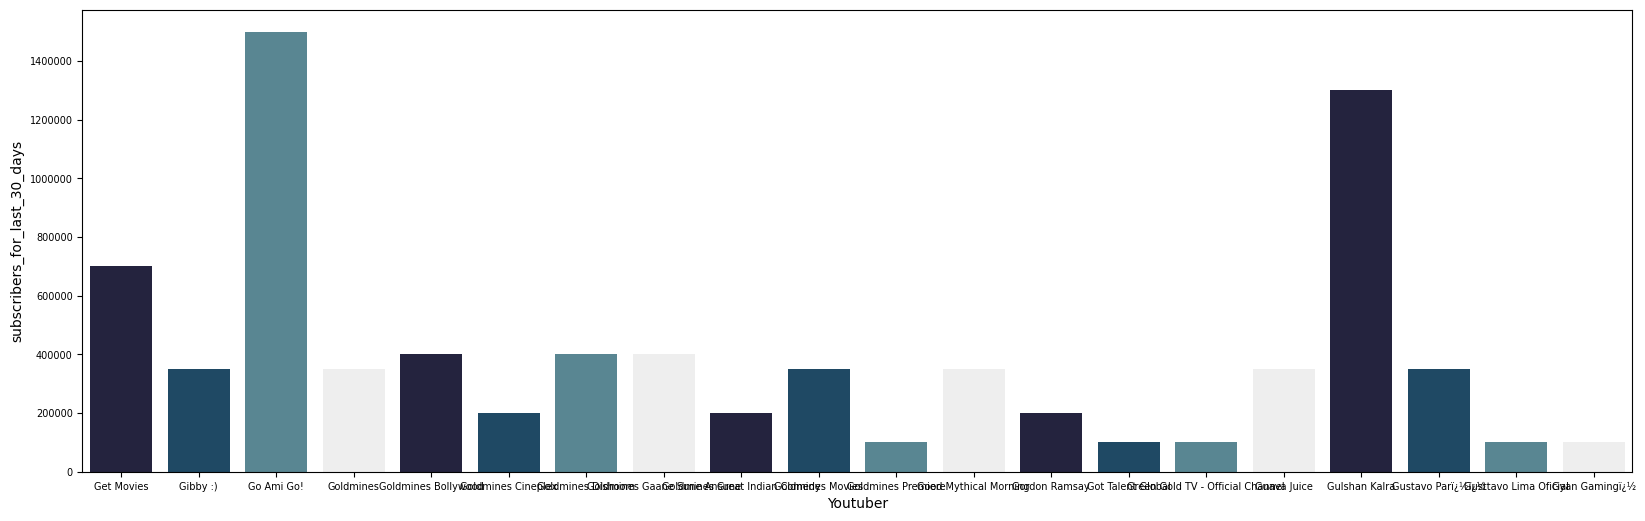

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


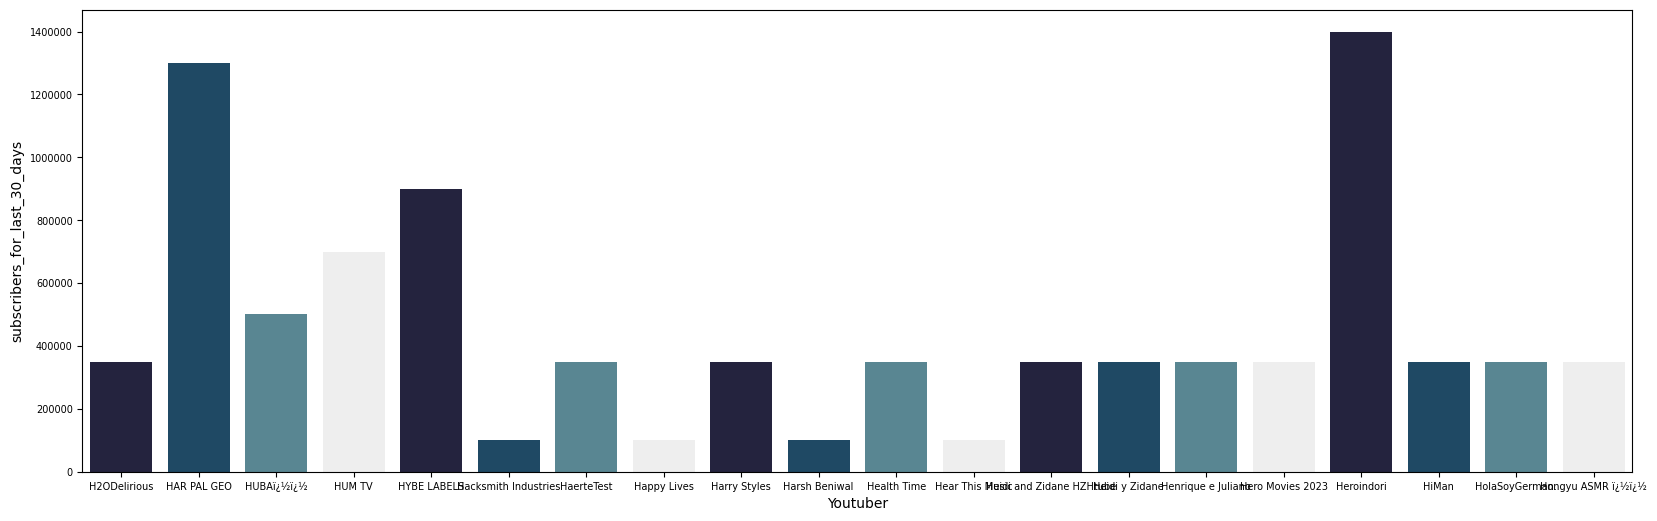

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


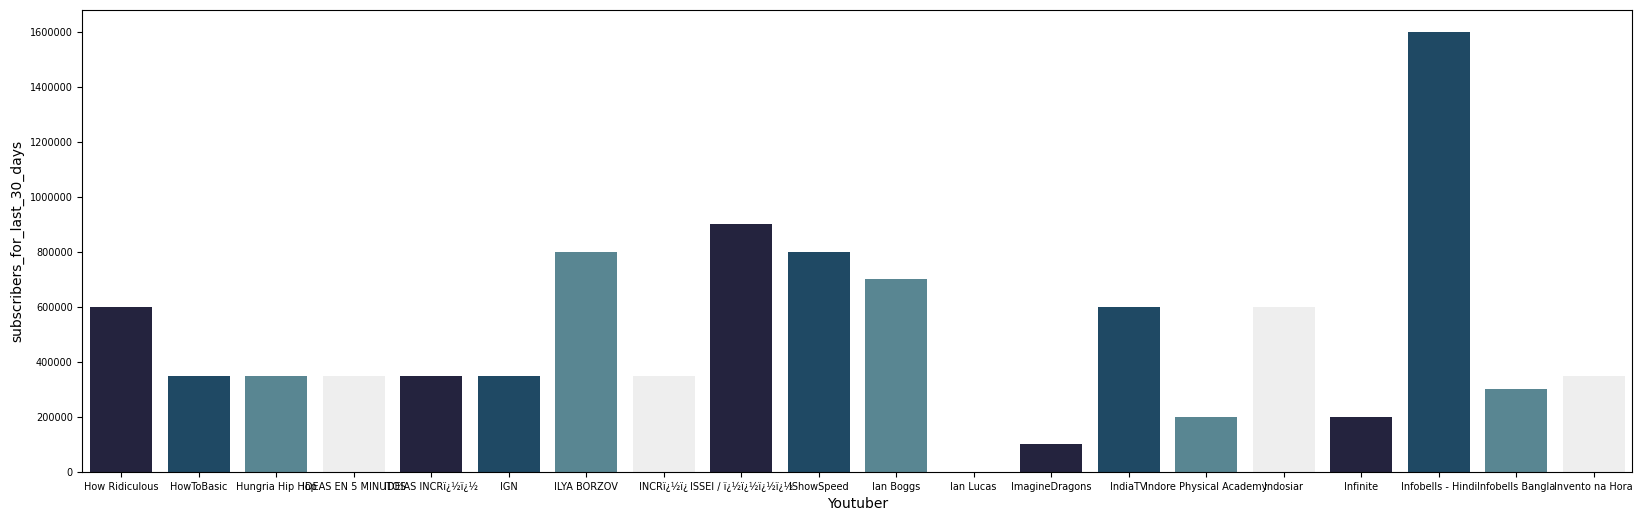

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


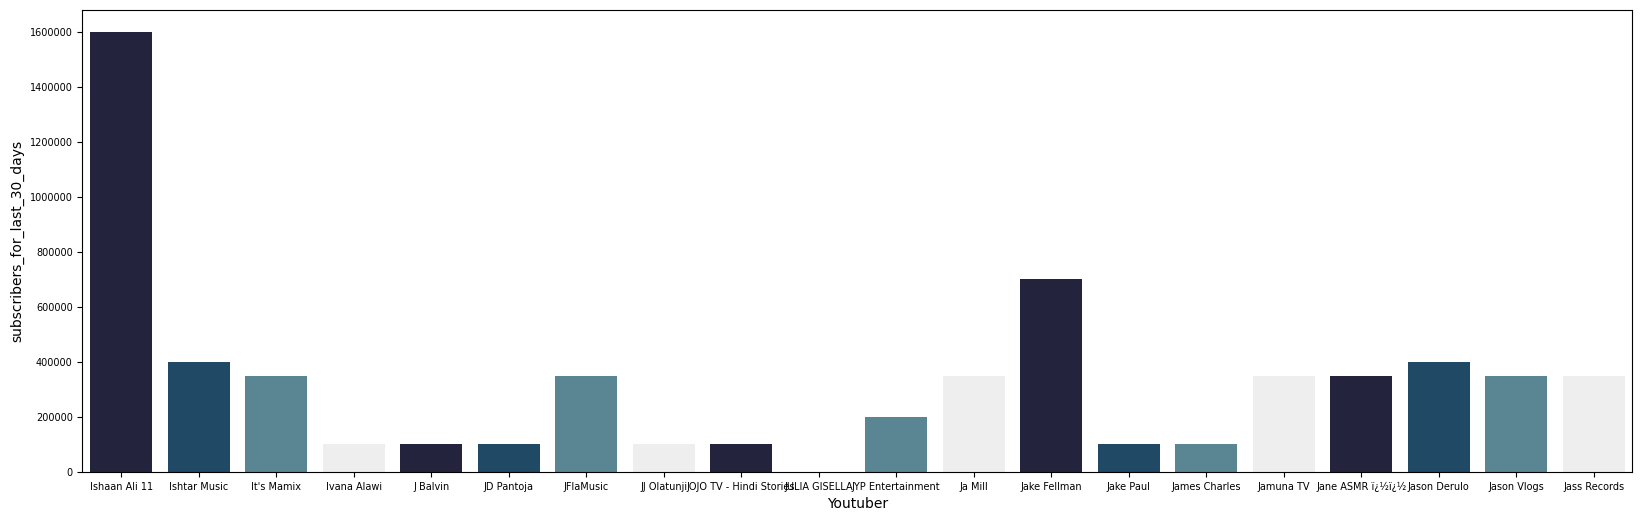

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


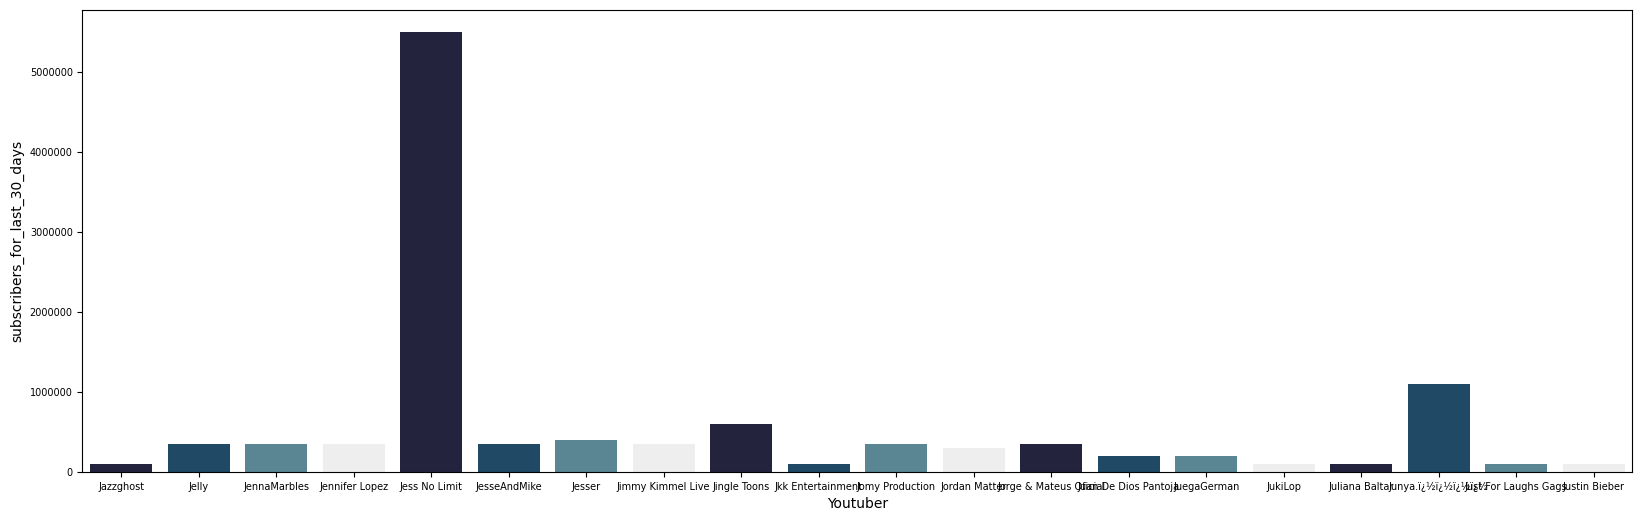

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


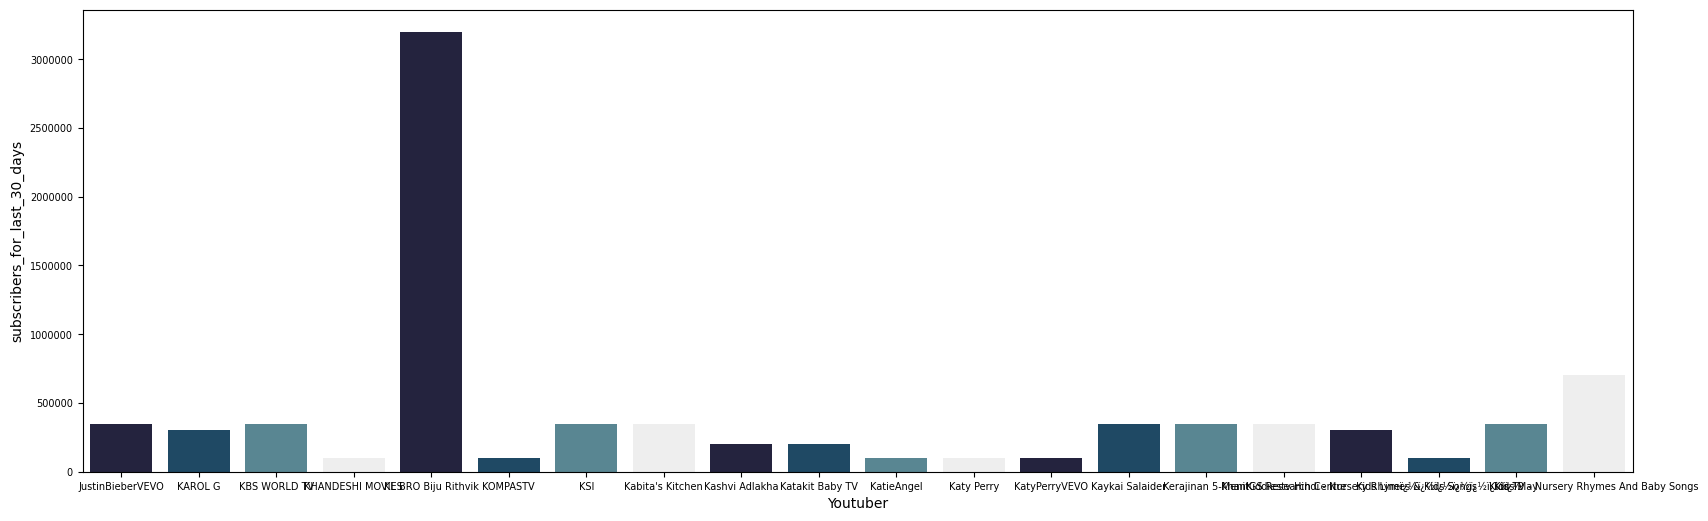

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


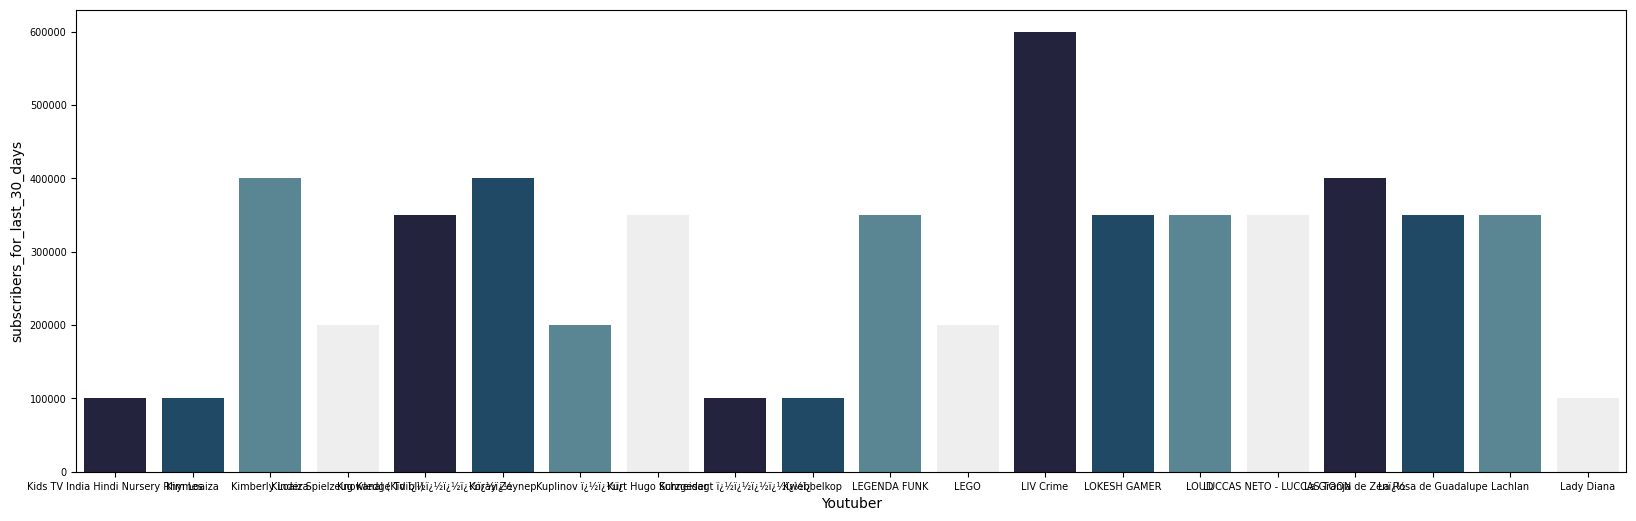

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


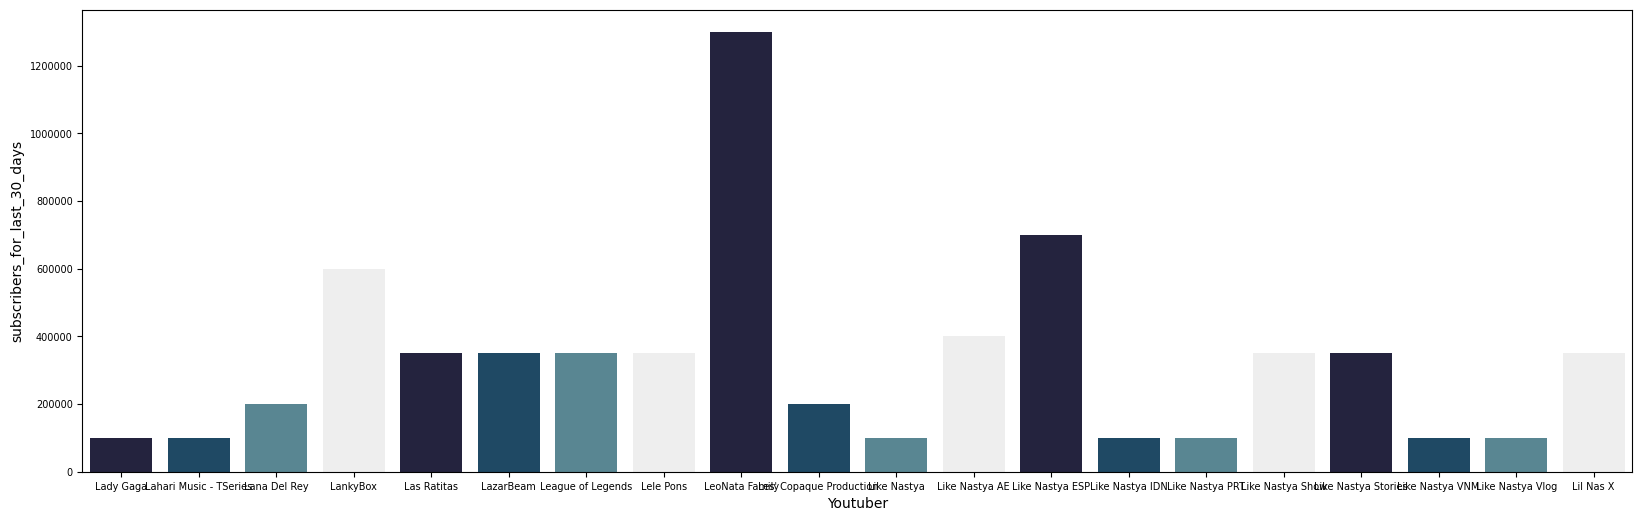

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


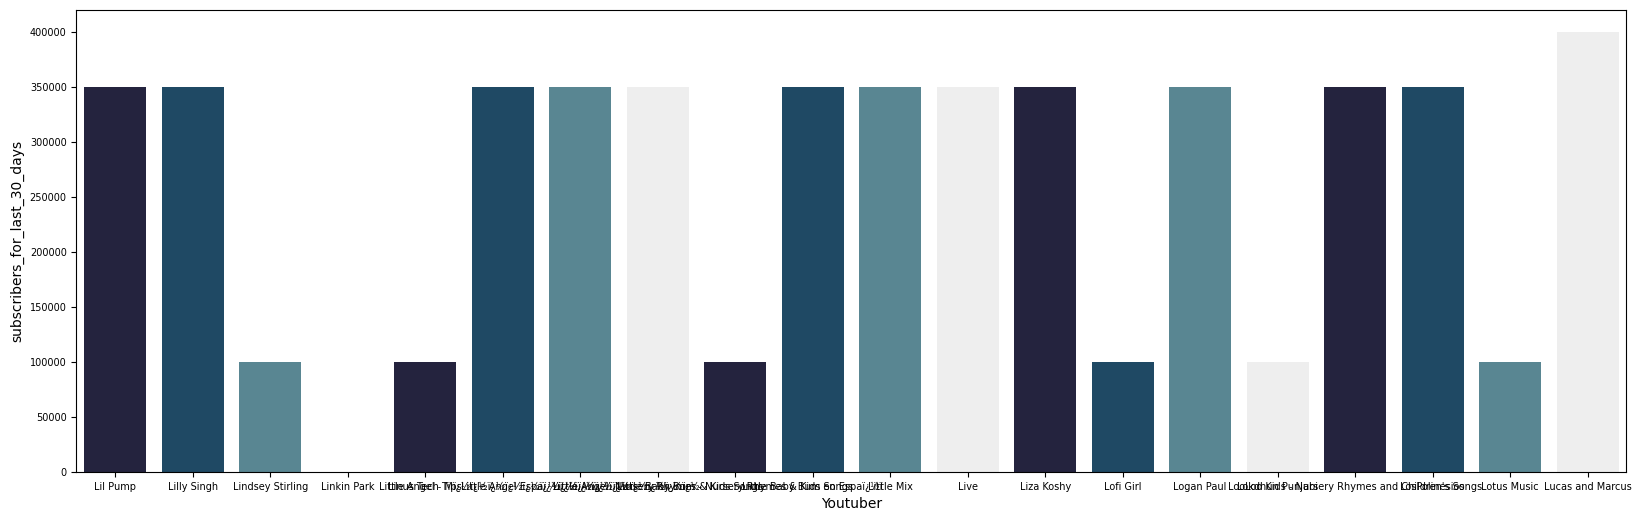

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


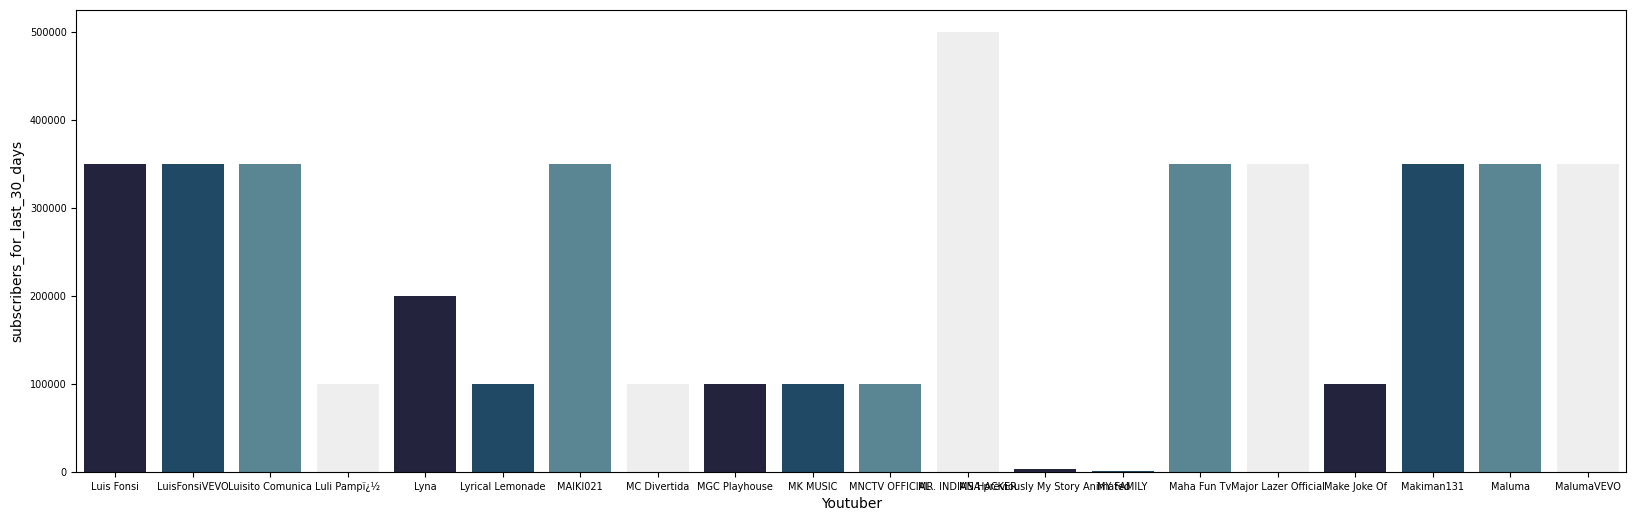

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


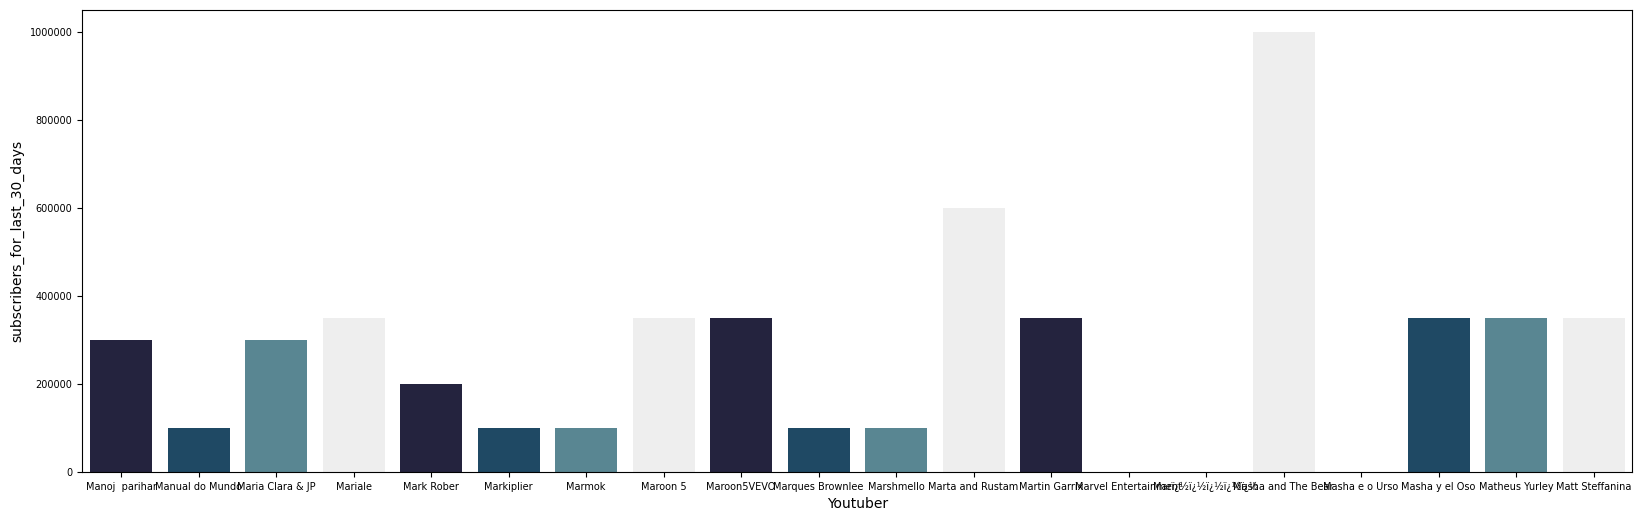

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


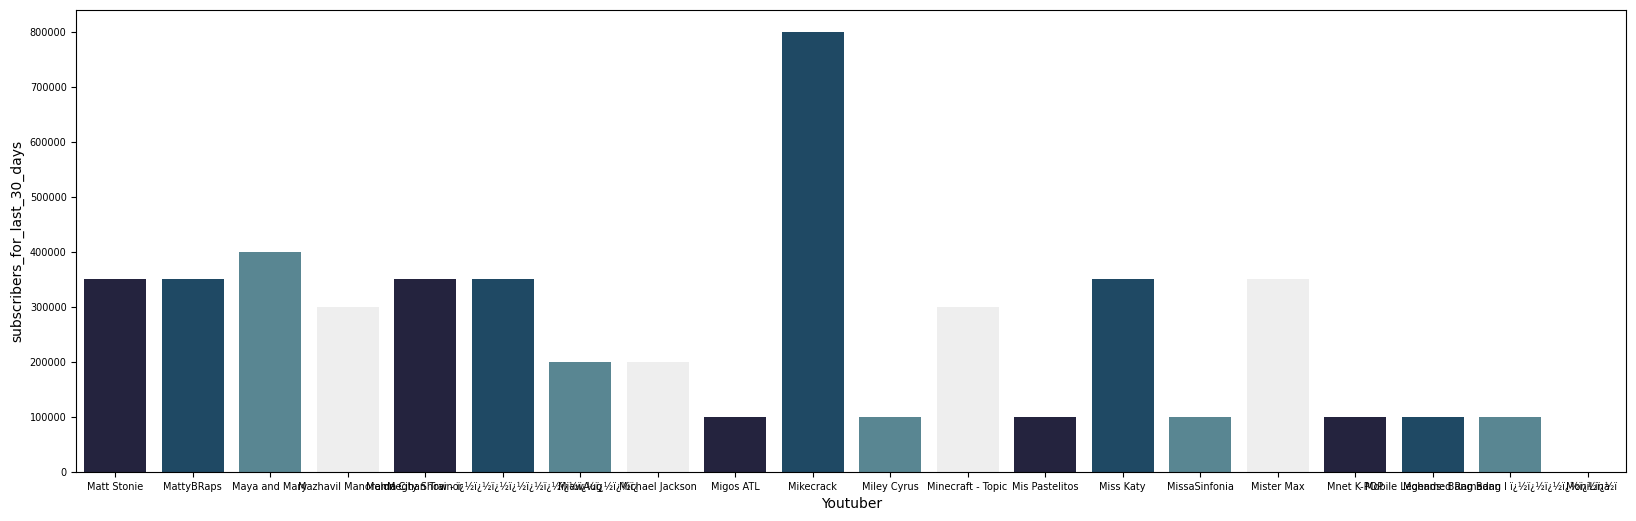

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


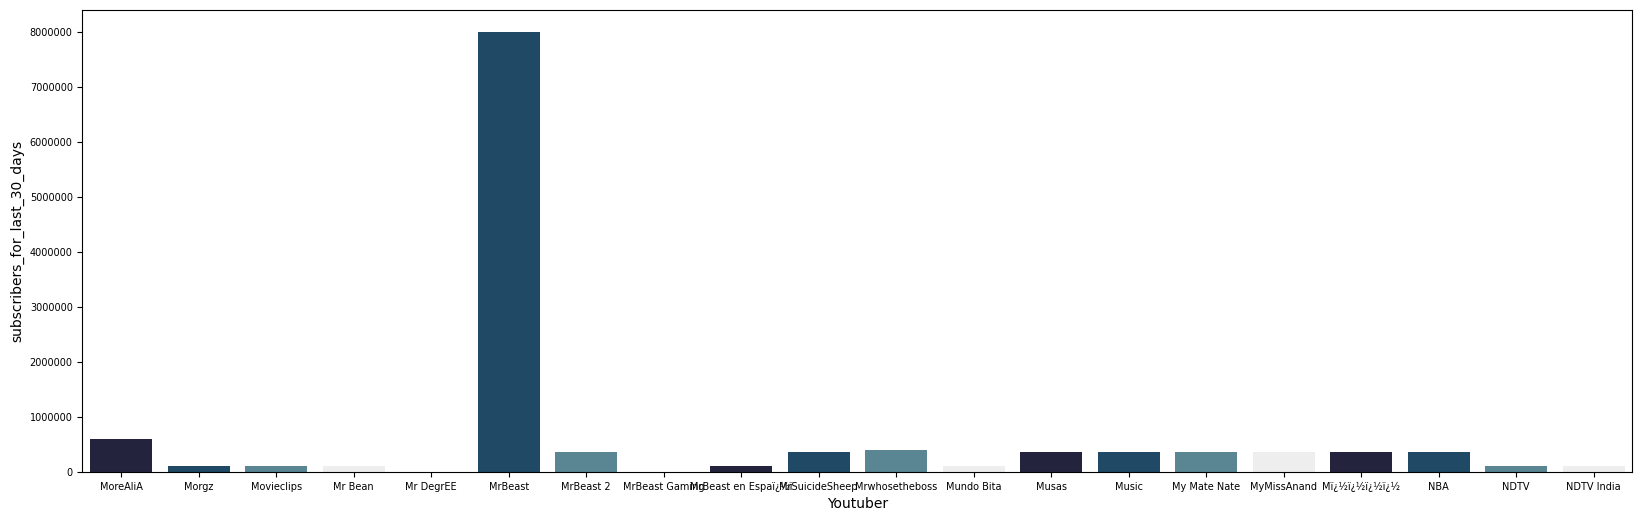

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


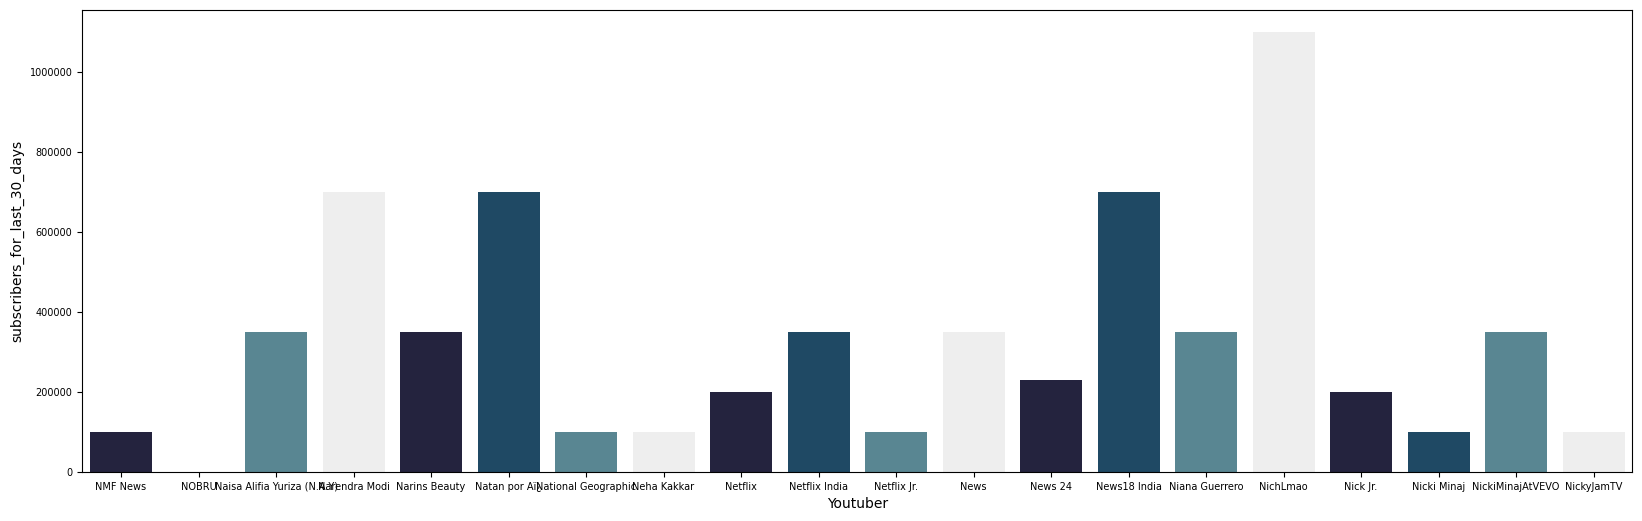

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


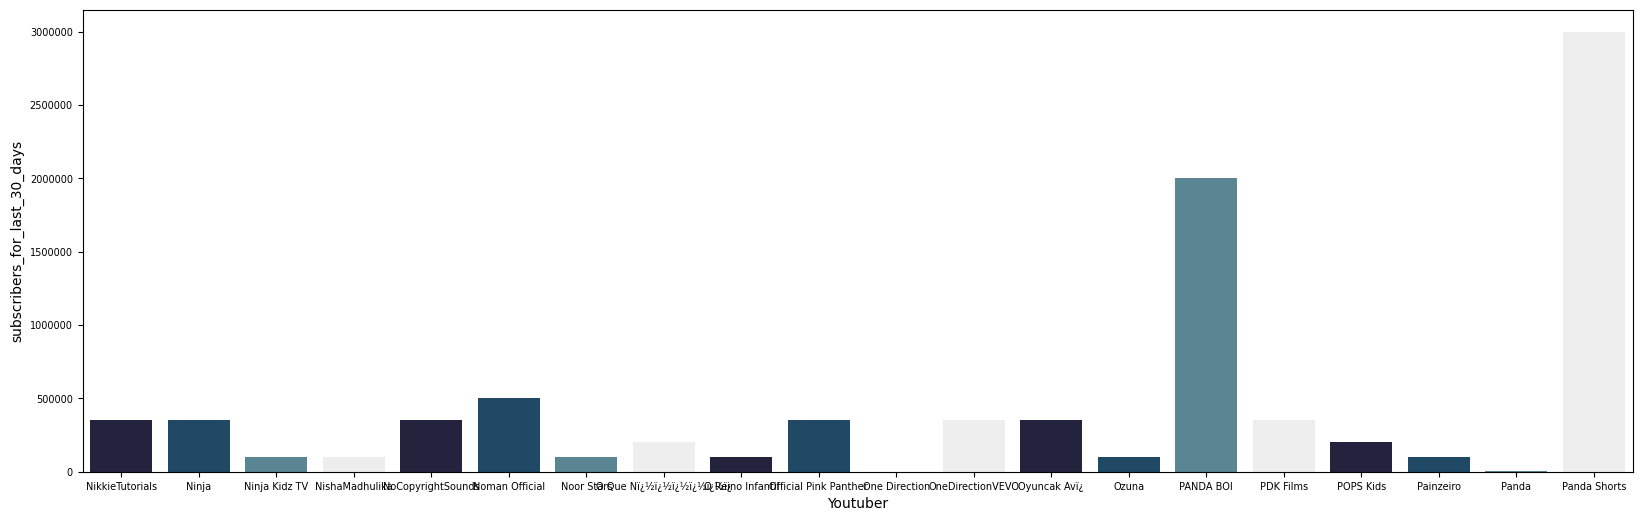

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


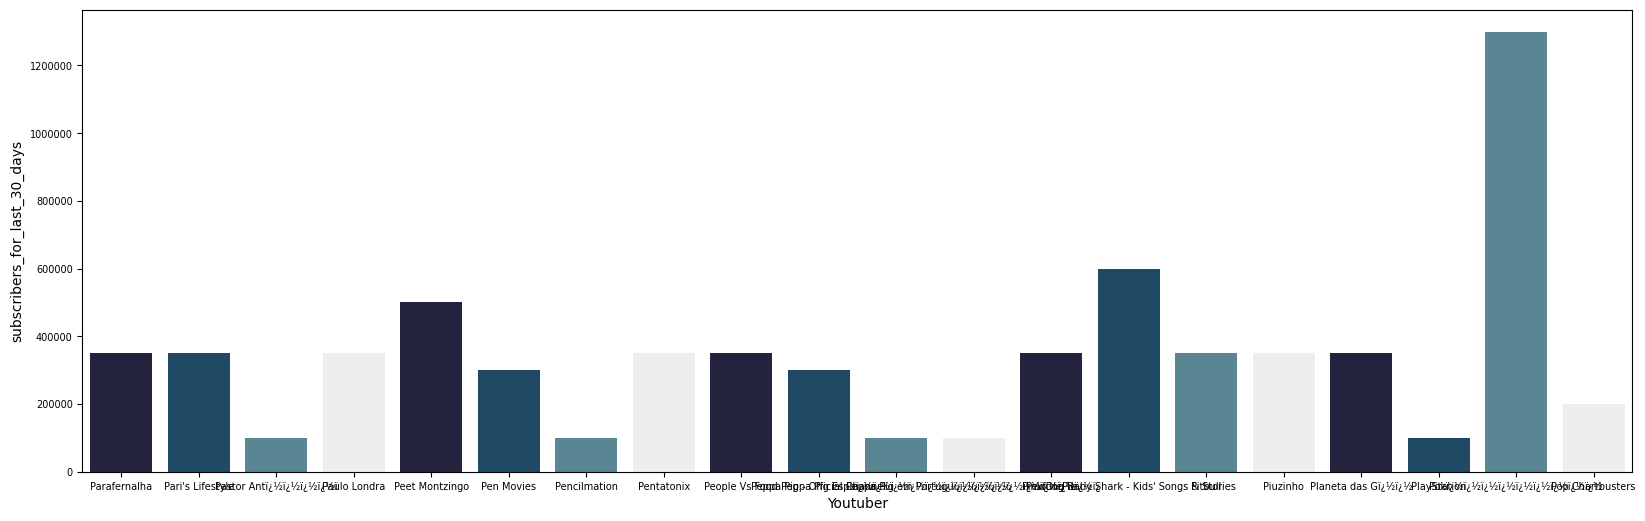

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


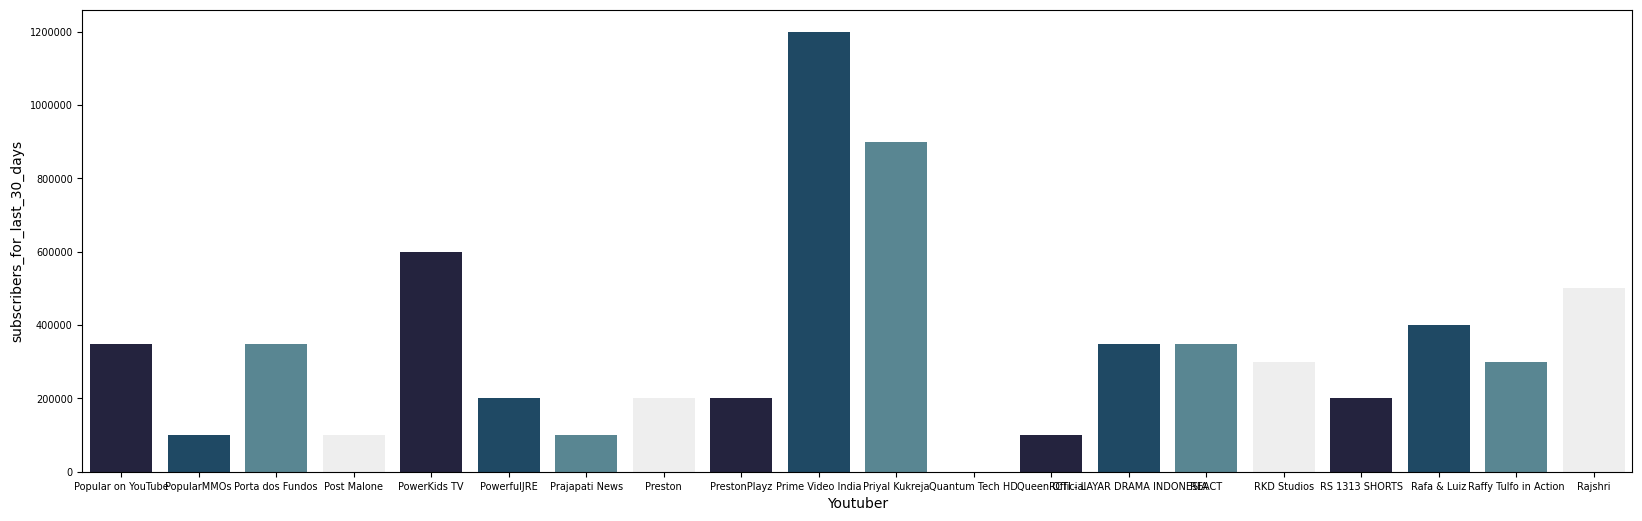

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


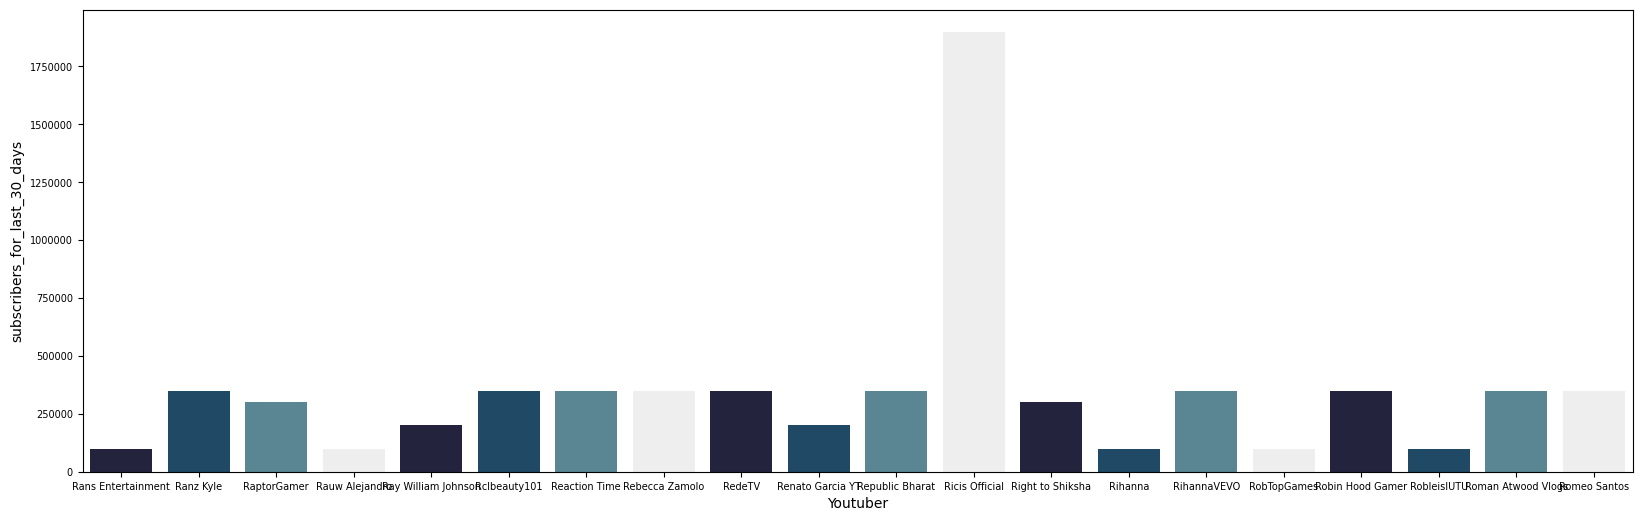

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


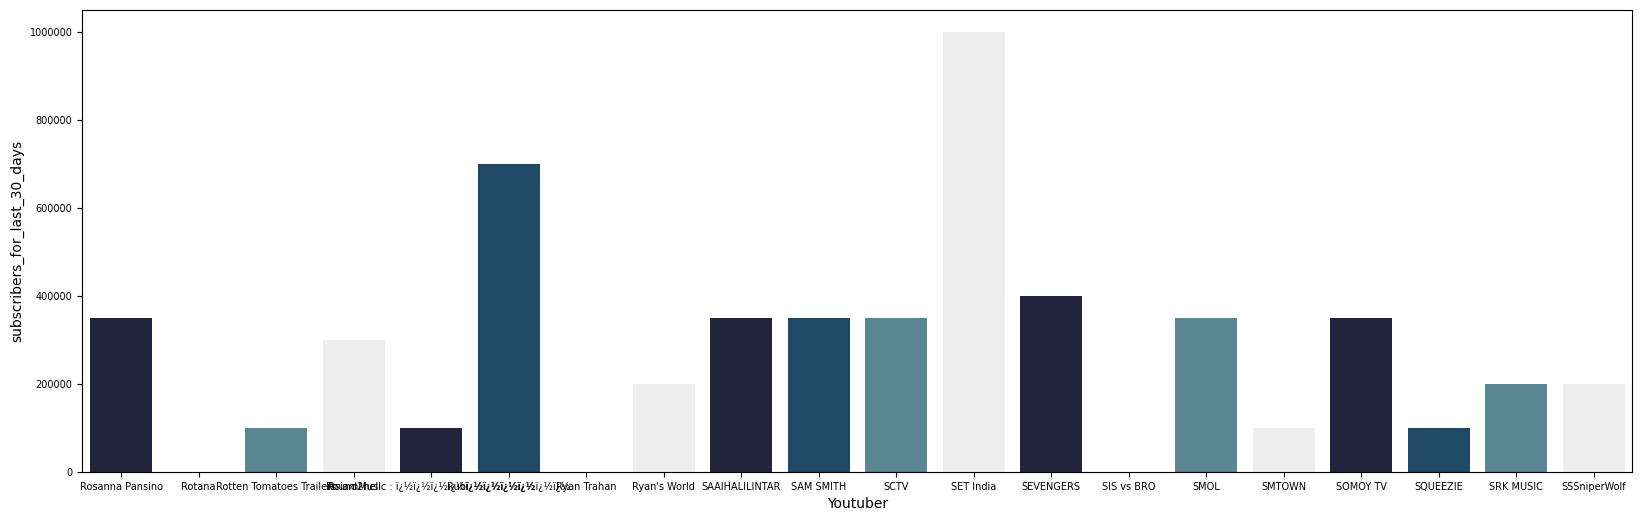

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


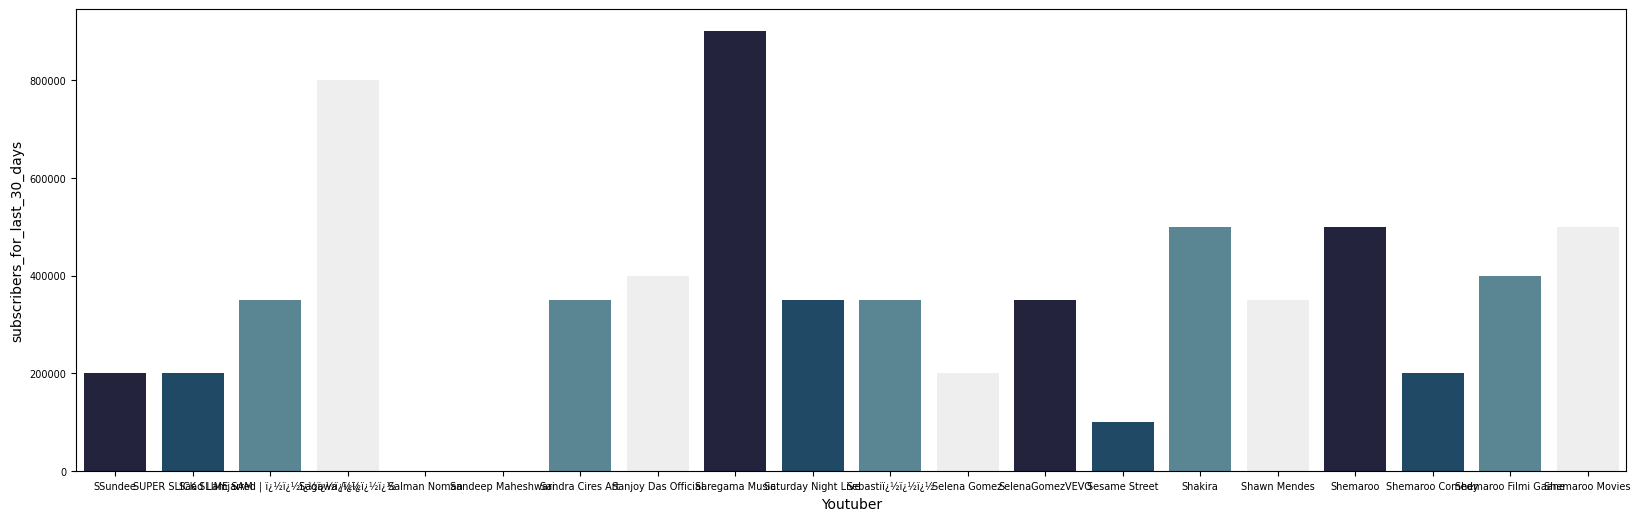

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


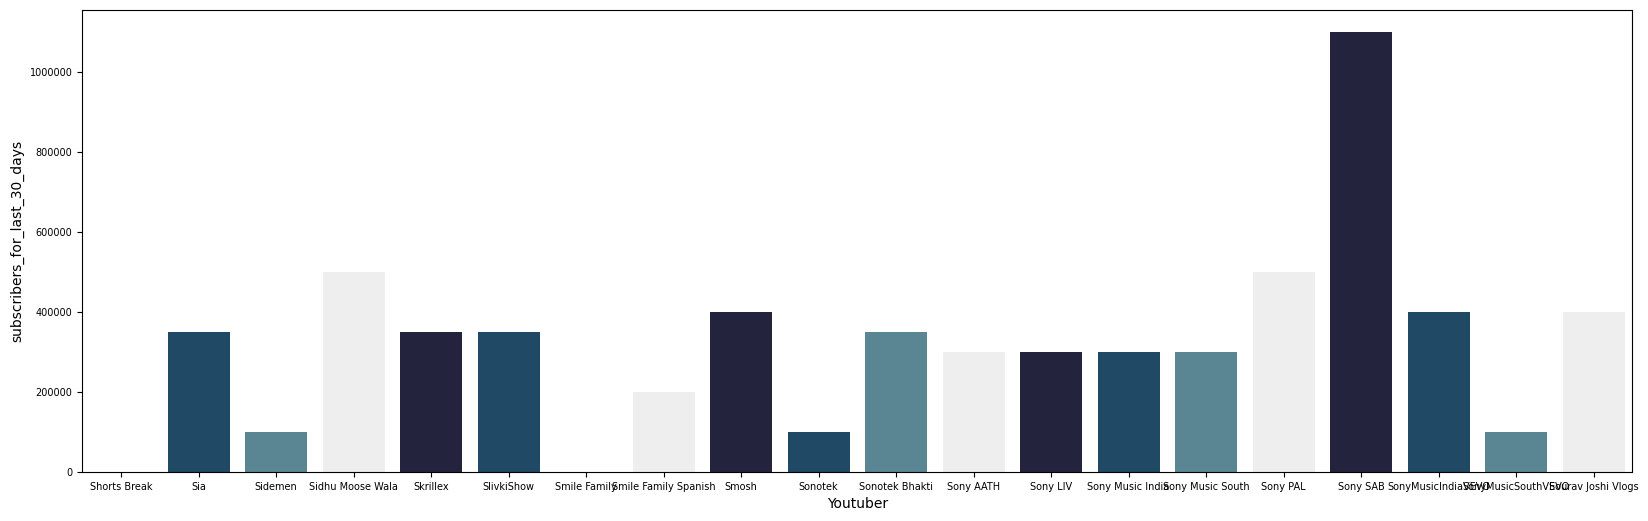

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


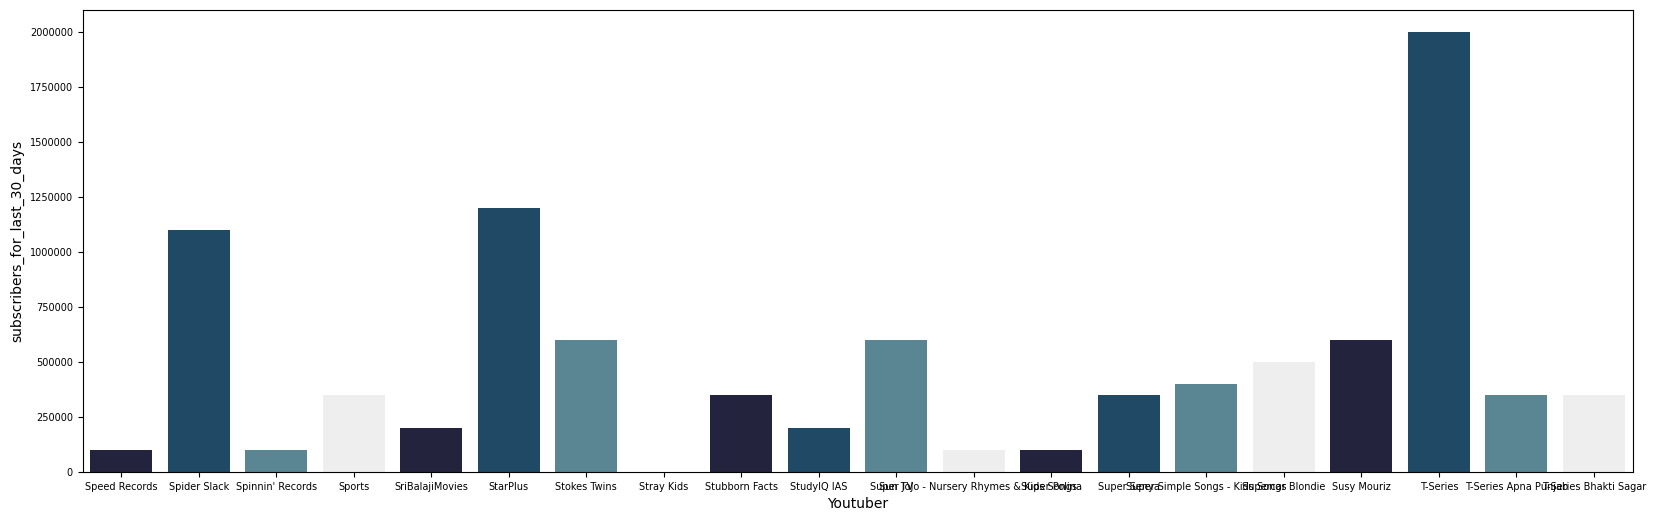

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


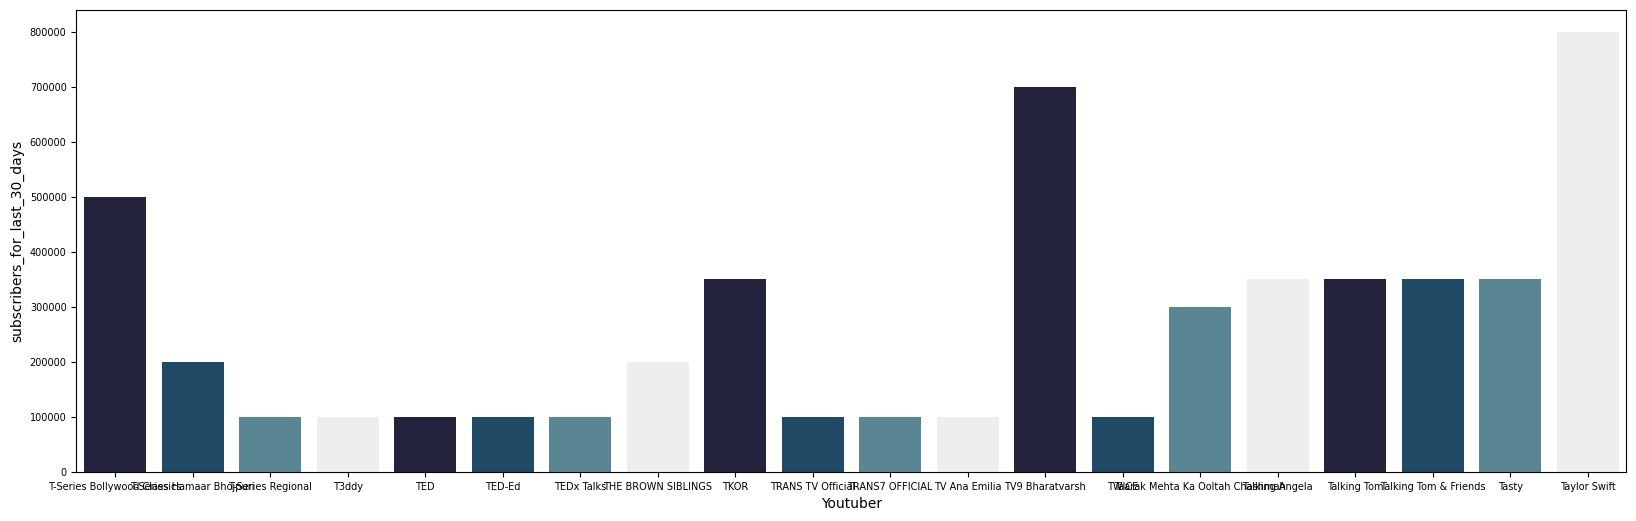

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


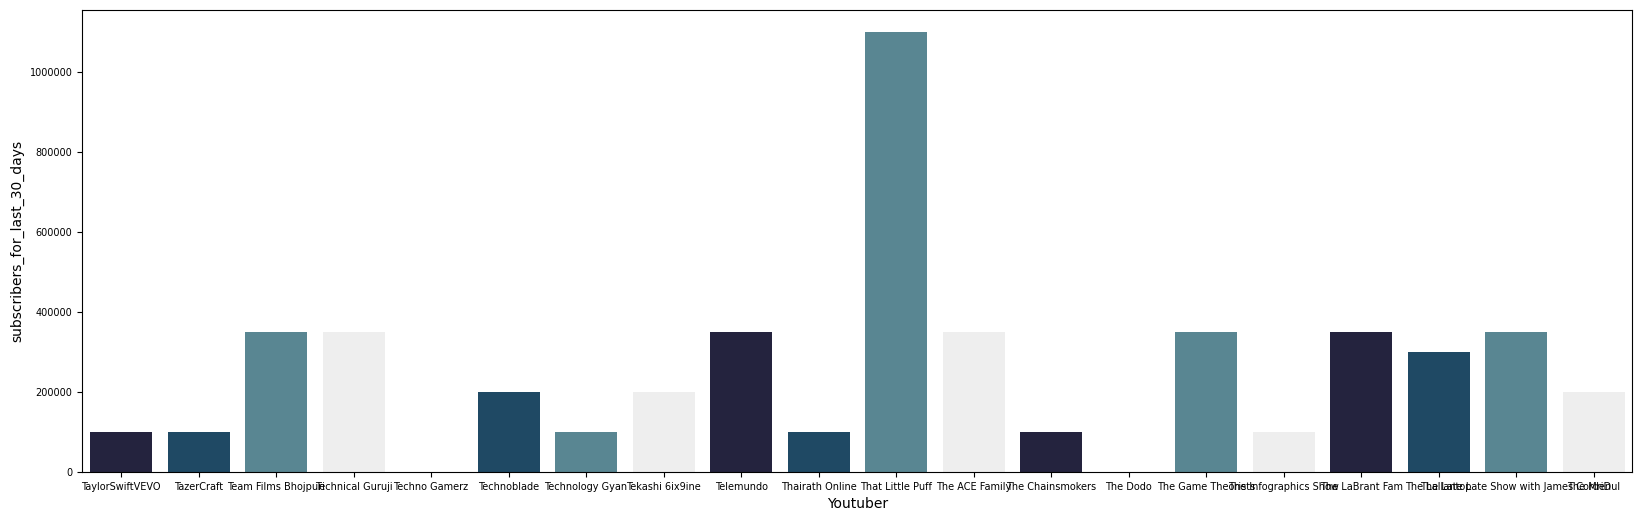

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


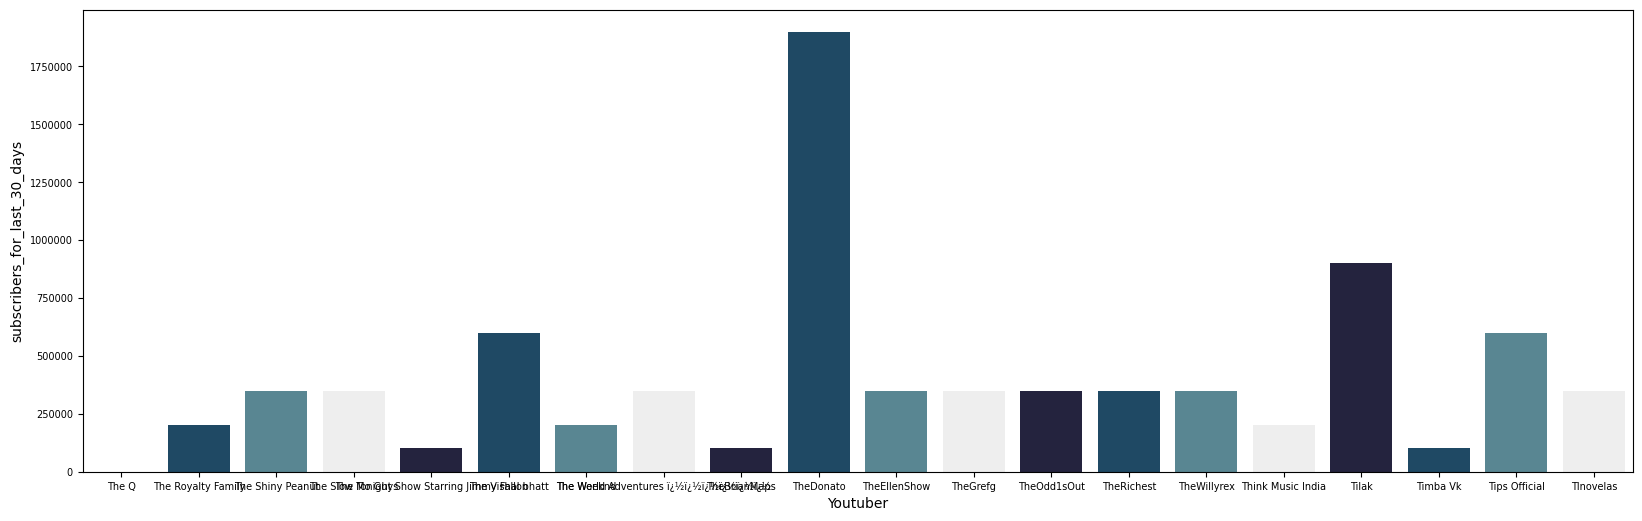

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


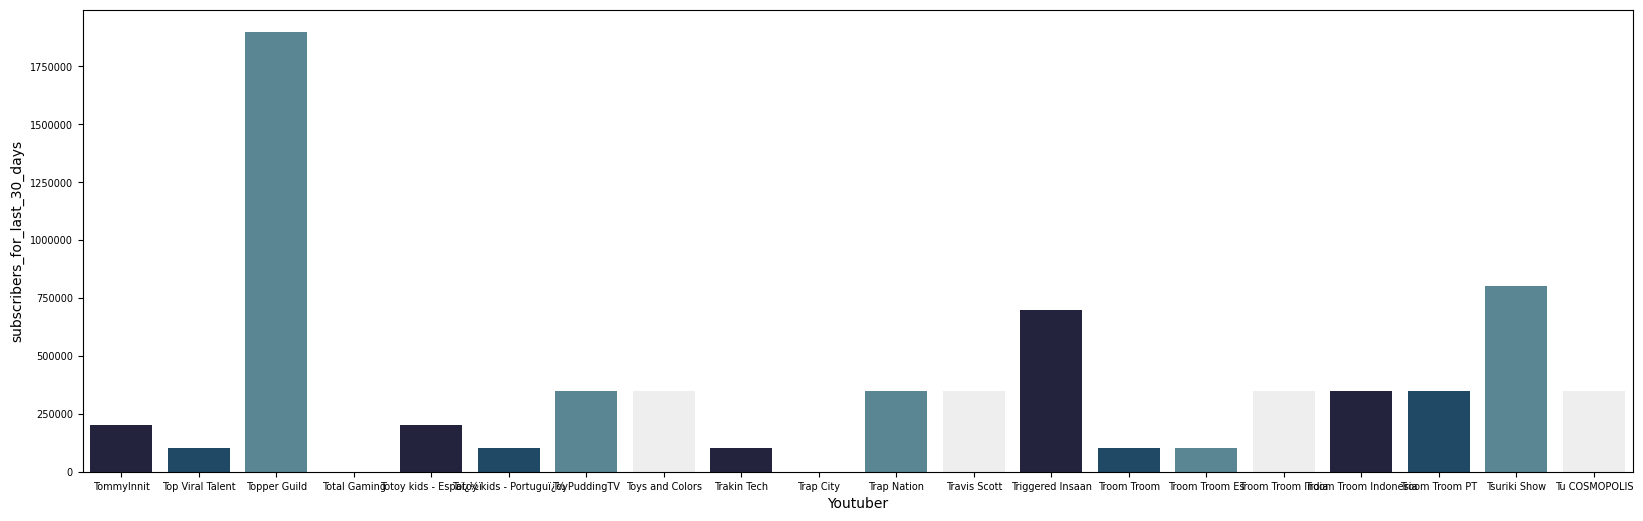

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


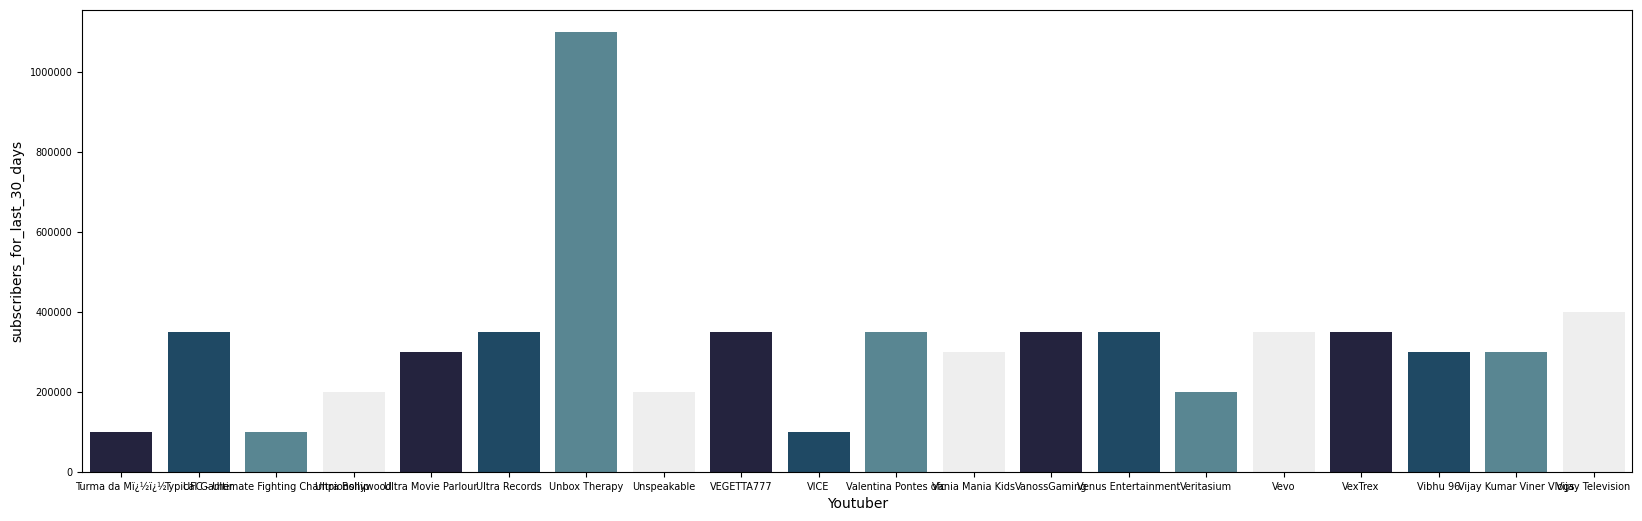

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


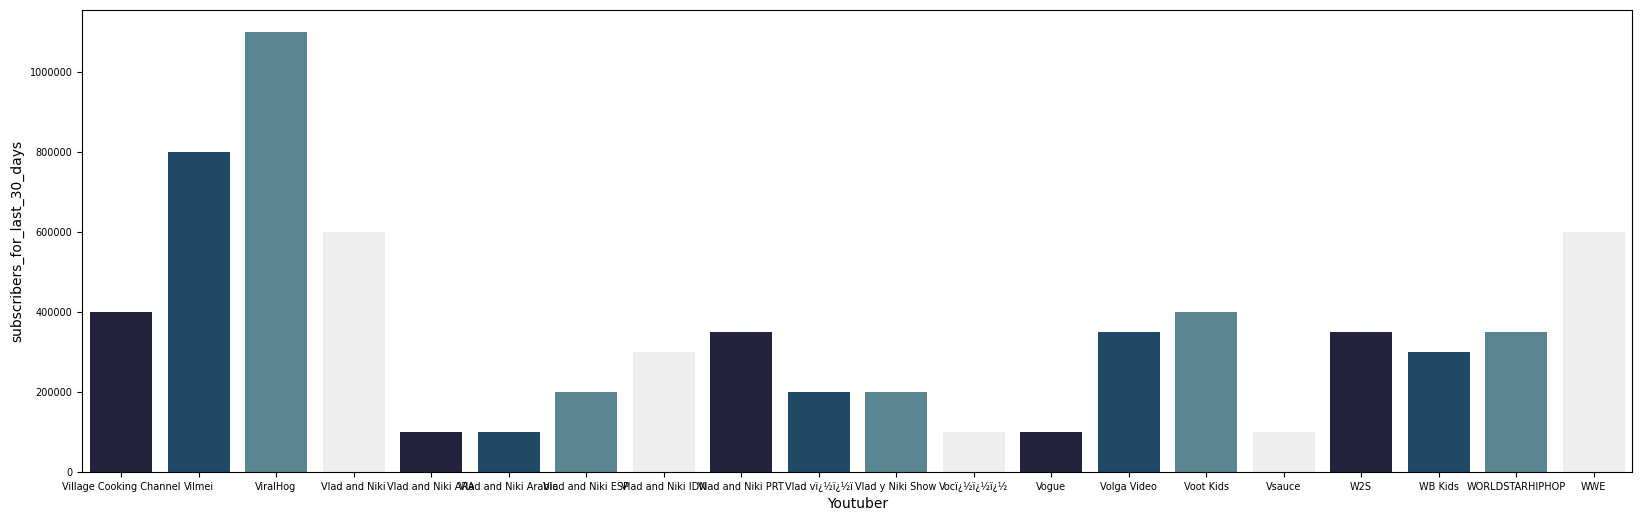

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


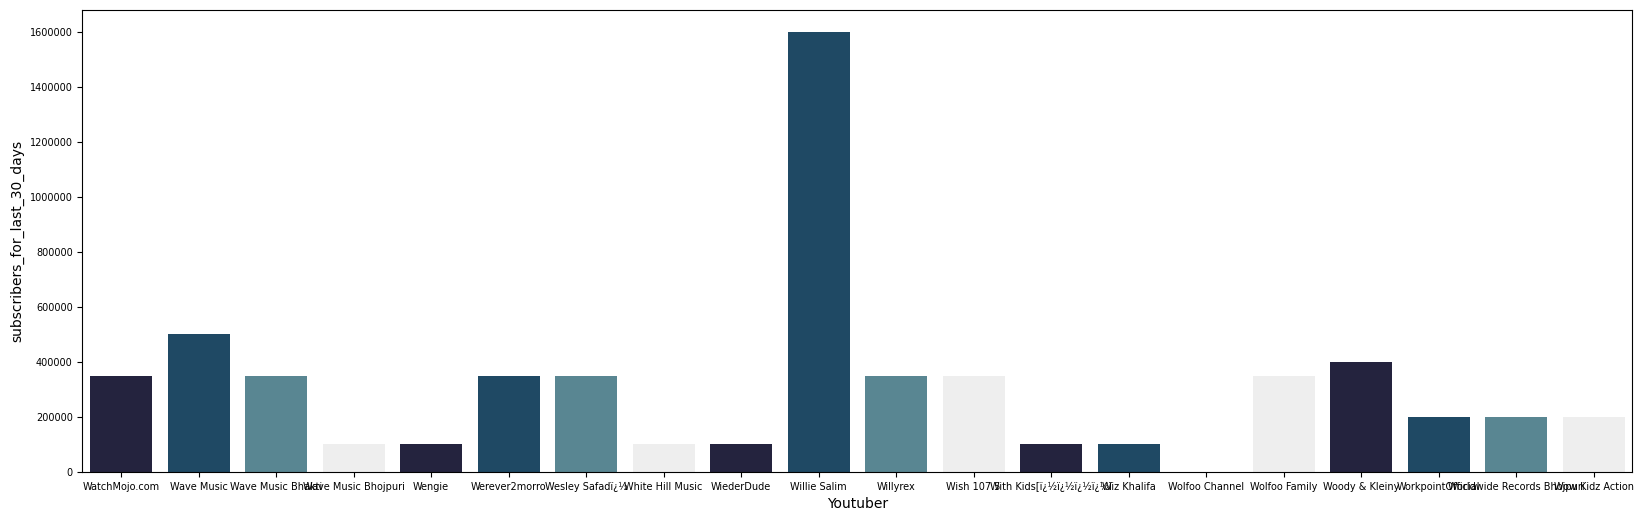

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


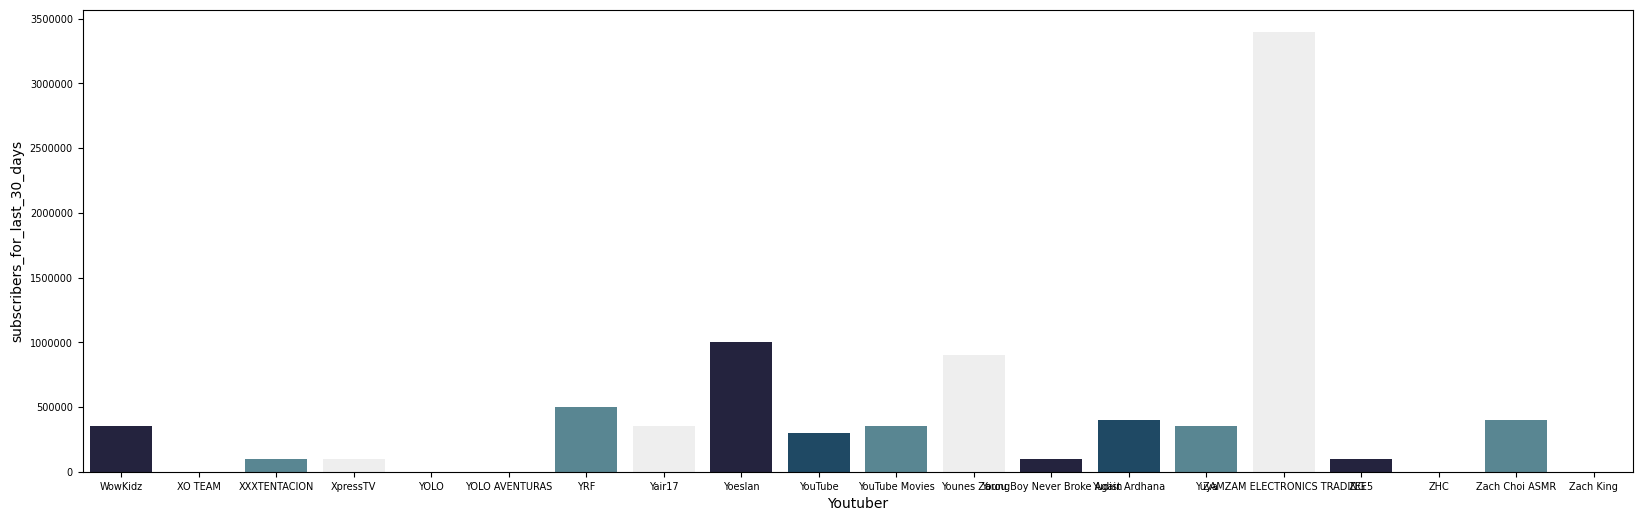

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


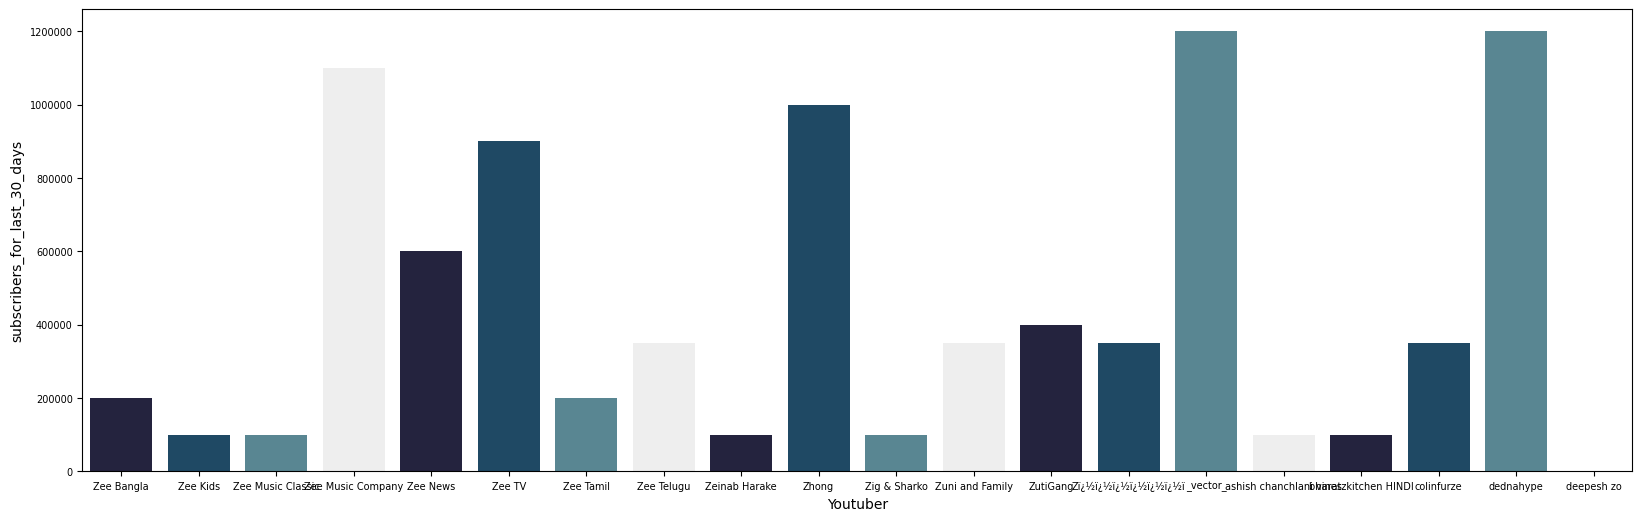

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


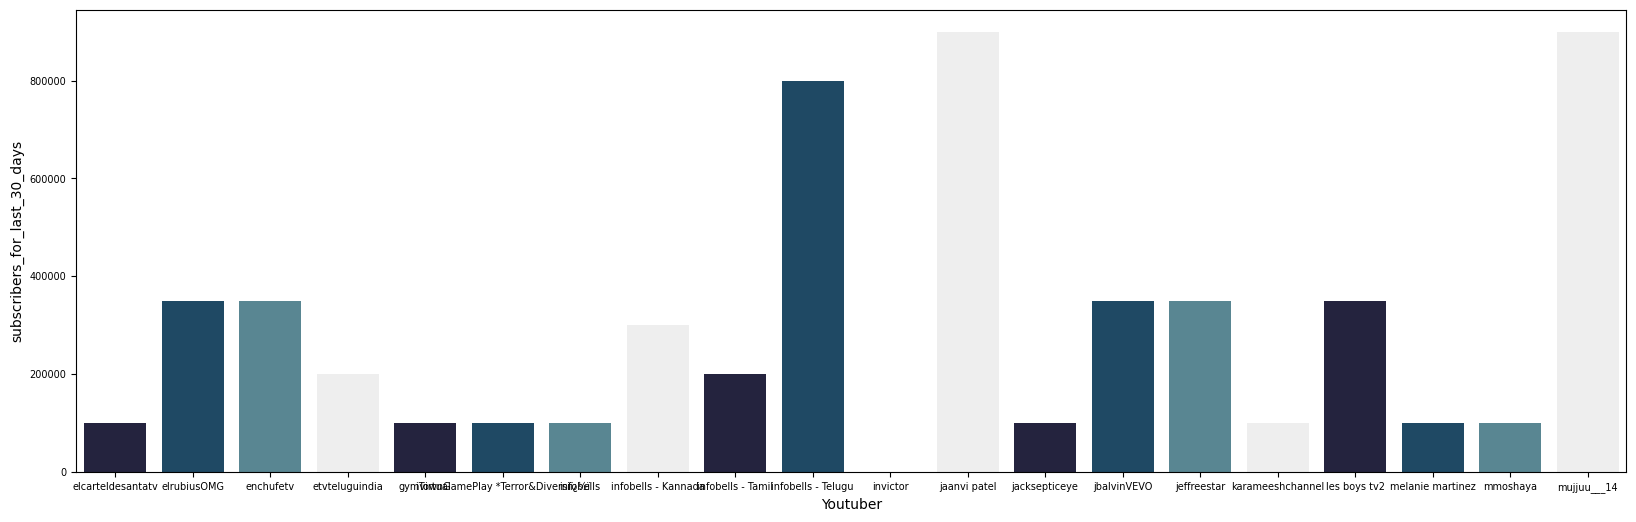

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


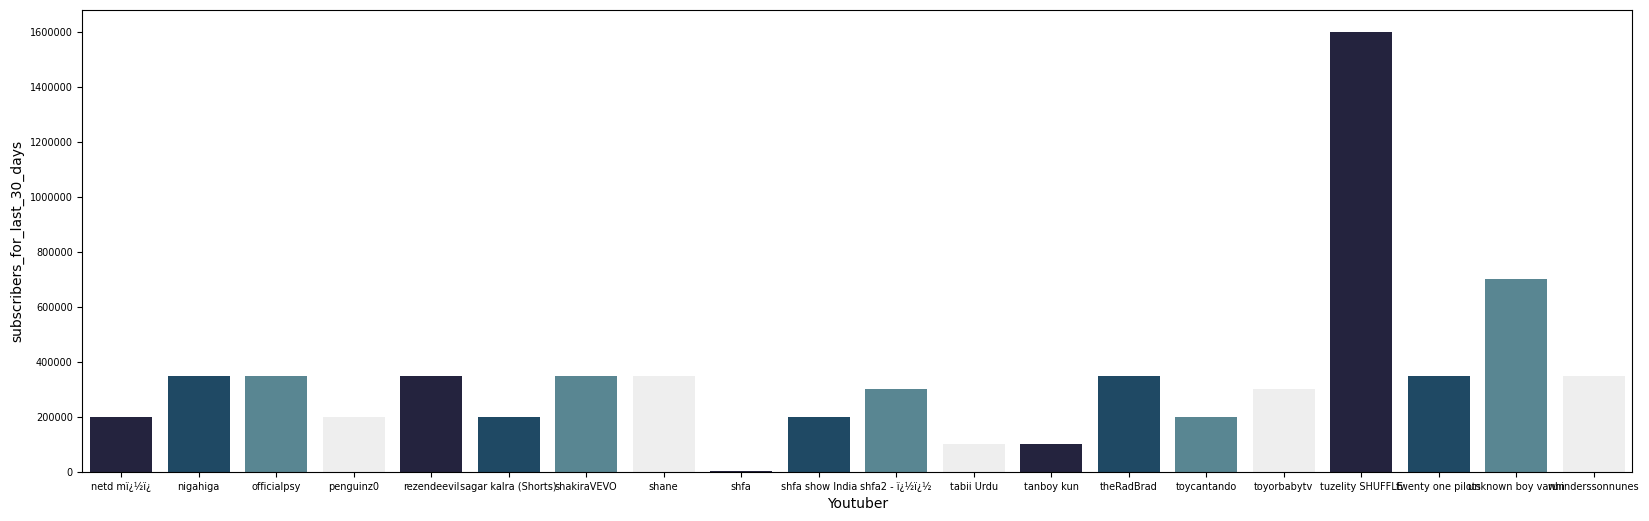

/tmp/ipython-input-3679762731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
/tmp/ipython-input-3679762731.py:4: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)


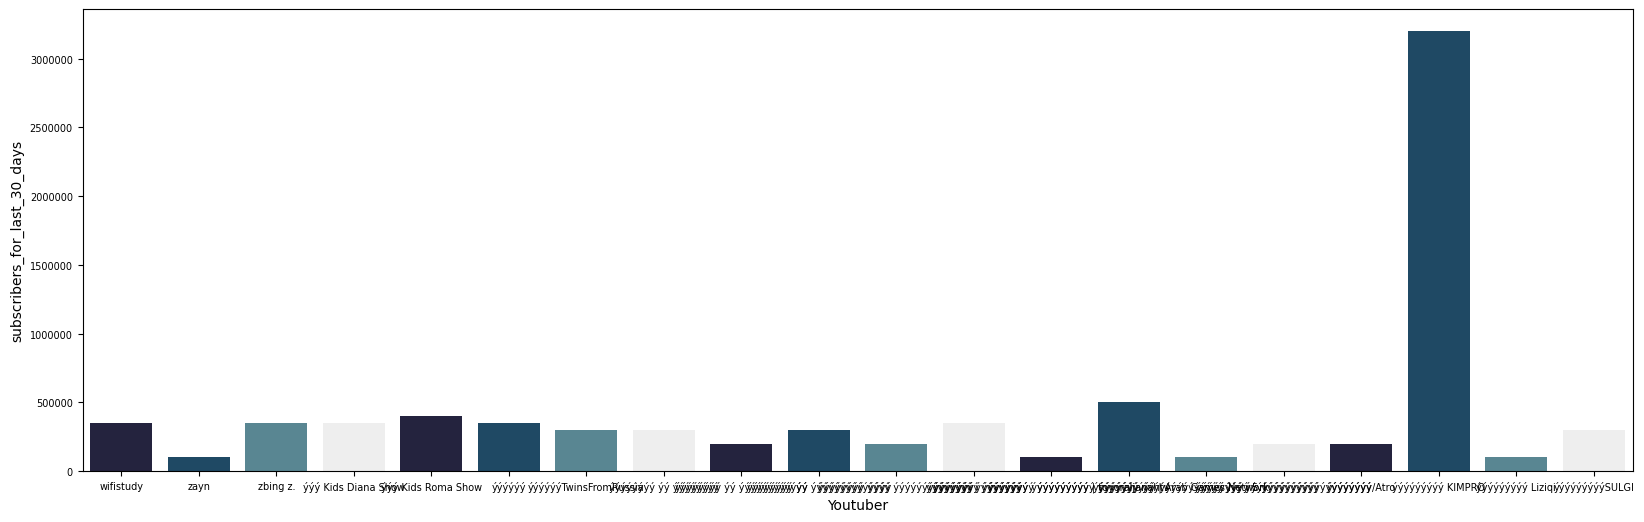

In [88]:
j = 0
for i in range(0,49) :
  plt.figure(figsize =(20,6))
  sns.barplot(x = grp.index[j:j+20] , y =grp[j:j+20],palette = palet)
  plt.tick_params(axis ='x' ,labelsize = 7 )
  plt.tick_params(axis ='y' ,labelsize = 7)
  plt.ticklabel_format(axis ='y' , style ='plain')
  plt.show()
  j = j + 20


In [99]:
grp = df.groupby('Abbreviation').agg(
    counts = ('Abbreviation','count'),
    unemployement_rate = ('Unemployment rate','mean')
)
grp = grp.sort_values(by = 'counts',ascending = False)
grp = grp.head(10)
grp

,counts,unemployement_rate
Abbreviation,,
US,440,13.154252
IN,170,5.360000
BR,62,12.080000
GB,44,3.850000
MX,33,3.420000
ID,28,4.690000
ES,22,13.960000
TH,18,0.750000
KR,17,4.150000


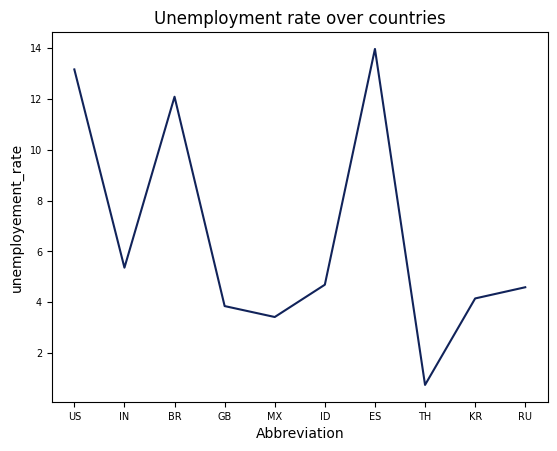

In [107]:
sns.lineplot(x =grp.index ,y =grp['unemployement_rate'] ,color = '#11235A')
plt.tick_params(  axis ='x' ,labelsize = 7 )
plt.tick_params(  axis ='y' ,labelsize = 7 )
plt.ticklabel_format(axis ='y' ,style ='plain')
plt.title('Unemployment rate over countries')
plt.show()

In [111]:
grp = df.groupby('Abbreviation')['Urban_population']
grp = grp.sum().round(2)
grp.shape

(49,)

/tmp/ipython-input-189724226.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x =grp.index[j:j+7] ,y = grp[j:j+7],palette = palet)
/tmp/ipython-input-189724226.py:3: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x =grp.index[j:j+7] ,y = grp[j:j+7],palette = palet)


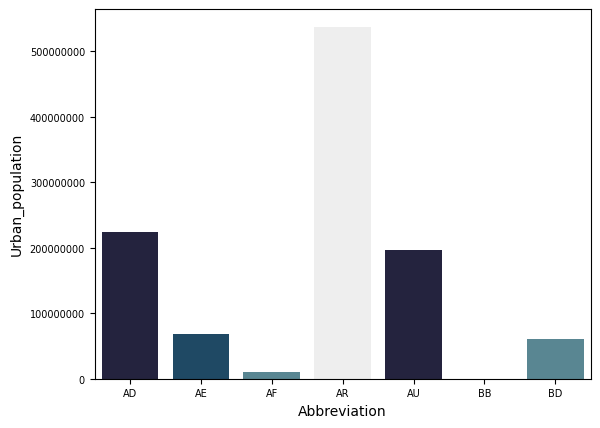

/tmp/ipython-input-189724226.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x =grp.index[j:j+7] ,y = grp[j:j+7],palette = palet)
/tmp/ipython-input-189724226.py:3: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x =grp.index[j:j+7] ,y = grp[j:j+7],palette = palet)


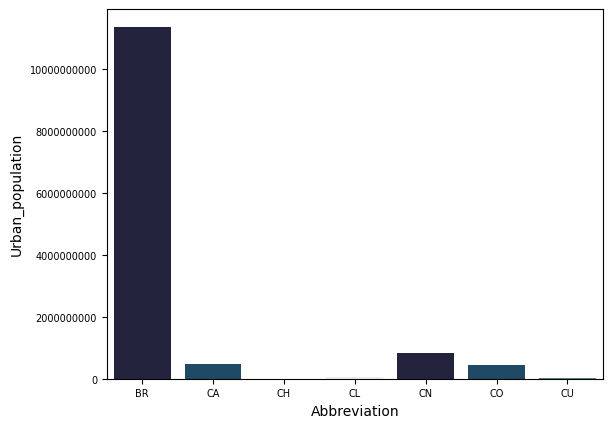

/tmp/ipython-input-189724226.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x =grp.index[j:j+7] ,y = grp[j:j+7],palette = palet)
/tmp/ipython-input-189724226.py:3: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x =grp.index[j:j+7] ,y = grp[j:j+7],palette = palet)


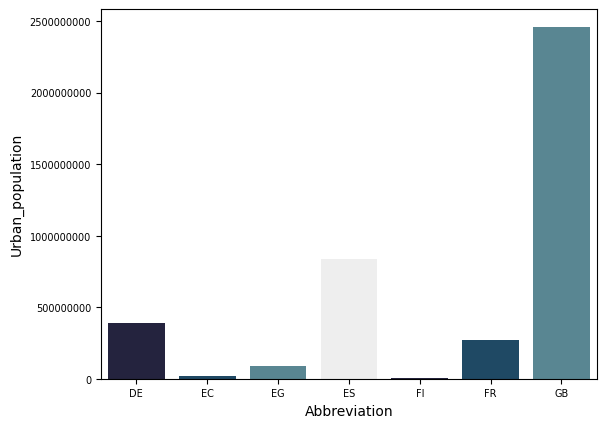

/tmp/ipython-input-189724226.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x =grp.index[j:j+7] ,y = grp[j:j+7],palette = palet)
/tmp/ipython-input-189724226.py:3: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x =grp.index[j:j+7] ,y = grp[j:j+7],palette = palet)


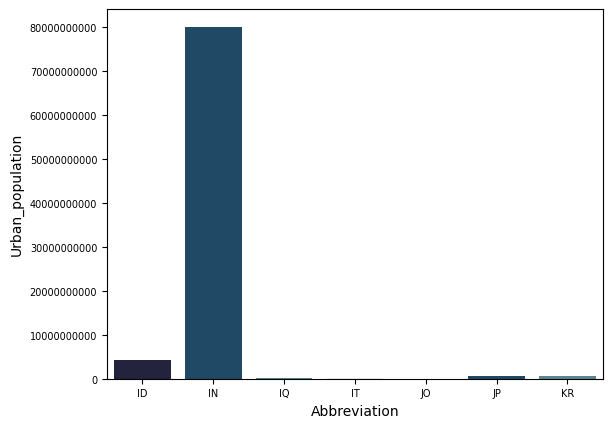

/tmp/ipython-input-189724226.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x =grp.index[j:j+7] ,y = grp[j:j+7],palette = palet)
/tmp/ipython-input-189724226.py:3: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x =grp.index[j:j+7] ,y = grp[j:j+7],palette = palet)


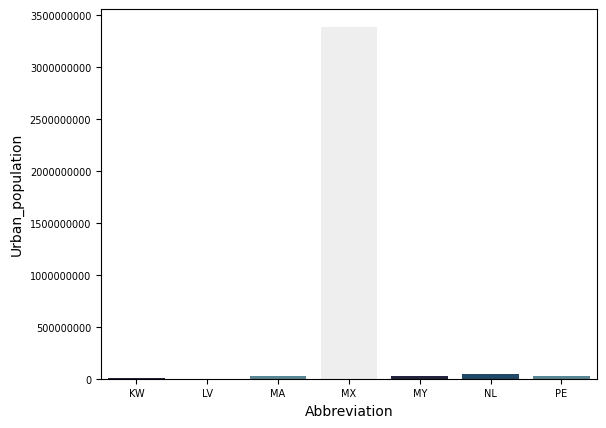

/tmp/ipython-input-189724226.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x =grp.index[j:j+7] ,y = grp[j:j+7],palette = palet)
/tmp/ipython-input-189724226.py:3: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x =grp.index[j:j+7] ,y = grp[j:j+7],palette = palet)


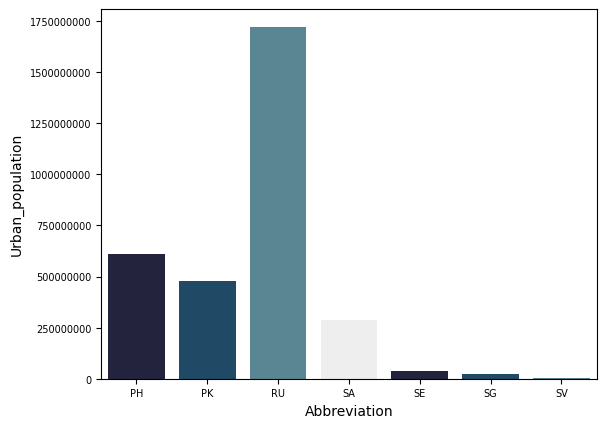

/tmp/ipython-input-189724226.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x =grp.index[j:j+7] ,y = grp[j:j+7],palette = palet)
/tmp/ipython-input-189724226.py:3: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x =grp.index[j:j+7] ,y = grp[j:j+7],palette = palet)


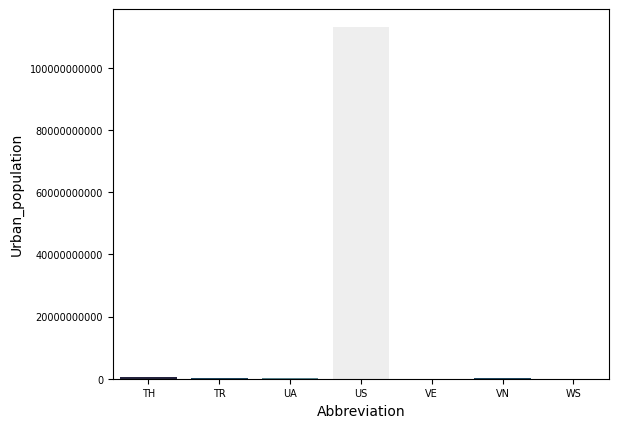

In [114]:
j = 0
for i in range(0,7) :
  sns.barplot(x =grp.index[j:j+7] ,y = grp[j:j+7],palette = palet)
  plt.tick_params(axis ='x' ,labelsize = 7 )
  plt.tick_params(axis ='y' ,labelsize = 7 )
  plt.ticklabel_format(axis ='y' ,style ='plain')
  plt.show()
  j = j + 7